In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import numpy as np
import gzip
import os
import anndata as ad
# from GraphST import GraphST
# from GraphST.utils import clustering
# import torch
import pickle
# try Plot in scale bar
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import scanpy as sc
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
import numpy as np
from scipy.spatial.distance import cdist

/tmp/ipykernel_2687849/355981057.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
sc.settings.verbosity = 0
pd.set_option('display.max_columns', 500)
#pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)
sc.settings.n_jobs=10

In [3]:
adata_comb = sc.read_h5ad("../output_files/objects/adata_comb_allTP_whole_meta_raw.h5ad")

# Segregation the GC from each timepoint

## D14PI

/tmp/ipykernel_965432/3110141408.py:4: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_d14.obs['GC'] = adata_d14_gst.obs['Germinal_Center2']
/home/sj657/miniconda3/envs/c2l_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


[<Axes: xlabel='spatial1', ylabel='spatial2'>]

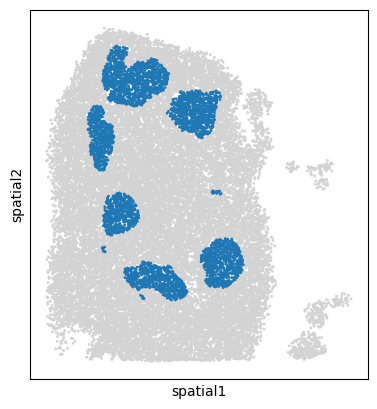

In [5]:
adata_d14_gst = sc.read_h5ad("../output_files/objects/GraphST_objects/adata_D14_GraphST_leiden.h5ad")
adata_d14 = adata_comb[adata_comb.obs['Sample']=="D14PI"]
adata_d14.obs.index = adata_d14.obs['barcode']
adata_d14.obs['GC'] = adata_d14_gst.obs['Germinal_Center2']
sc.pl.spatial(adata_d14, color = 'GC',title='',spot_size=35,show=False,legend_loc=None)

In [ ]:
## add GC index
### GC1
adata_gc1 = adata_d14[(adata_d14.obs['x']> 2326) & (adata_d14.obs['x']< 3145)]
adata_gc1 = adata_gc1[(adata_gc1.obs['y']> 1370) & (adata_gc1.obs['y']< 2324)]
sc.pl.spatial(adata_gc1, color = "GC",spot_size=30,show=False)
adata_gc1 = adata_gc1[adata_gc1.obs['GC']=="GC"]
adata_gc1.obs['GC_index'] = adata_gc1.obs['GC'].astype(str)
adata_gc1.obs['GC_index'] = "GC1"
gc_df = adata_gc1.obs[['GC_index','x','y']]
# calculate the centroid
# gc_df
cm = np.mean(gc_df[['x','y']],axis=0)
gc_df['centroid_x'] = cm[0];gc_df['centroid_y'] = cm[1]
gc_df1 = gc_df.copy()

### GC2
adata_gc1 = adata_d14[(adata_d14.obs['x']> 2119) & (adata_d14.obs['x']< 2496)]
adata_gc1 = adata_gc1[(adata_gc1.obs['y']> 2230) & (adata_gc1.obs['y']< 3072)]
adata_gc1
sc.pl.spatial(adata_gc1, color = "GC",spot_size=30,show=False)
adata_gc1 = adata_gc1[adata_gc1.obs['GC']=="GC"]
sc.pl.spatial(adata_gc1, color = "GC",spot_size=30,show=False)
adata_gc1.obs['GC_index'] = adata_gc1.obs['GC'].astype(str)
adata_gc1.obs['GC_index'] = "GC2"
gc_df = adata_gc1.obs[['GC_index','x','y']]
# calculate the centroid
# gc_df
cm = np.mean(gc_df[['x','y']],axis=0)
gc_df['centroid_x'] = cm[0];gc_df['centroid_y'] = cm[1]
gc_df2 = gc_df.copy()

### GC3
adata_gc1 = adata_d14[(adata_d14.obs['x']> 2287) & (adata_d14.obs['x']< 2869)]
adata_gc1 = adata_gc1[(adata_gc1.obs['y']> 3285) & (adata_gc1.obs['y']< 3877)]
adata_gc1
sc.pl.spatial(adata_gc1, color = "GC",spot_size=30,show=False)
adata_gc1 = adata_gc1[adata_gc1.obs['GC']=="GC"]
sc.pl.spatial(adata_gc1, color = "GC",spot_size=30,show=False)
adata_gc1.obs['GC_index'] = adata_gc1.obs['GC'].astype(str)
adata_gc1.obs['GC_index'] = "GC3"
gc_df = adata_gc1.obs[['GC_index','x','y']]
# calculate the centroid
# gc_df
cm = np.mean(gc_df[['x','y']],axis=0)
gc_df['centroid_x'] = cm[0];gc_df['centroid_y'] = cm[1]
gc_df3 = gc_df.copy()

### GC4
adata_gc1 = adata_d14[(adata_d14.obs['x']> 2551) & (adata_d14.obs['x']< 3399)]
adata_gc1 = adata_gc1[(adata_gc1.obs['y']> 4099) & (adata_gc1.obs['y']< 4698)]
adata_gc1
sc.pl.spatial(adata_gc1, color = "GC",spot_size=30,show=False)
adata_gc1 = adata_gc1[adata_gc1.obs['GC']=="GC"]
sc.pl.spatial(adata_gc1, color = "GC",spot_size=30,show=False)
adata_gc1.obs['GC_index'] = adata_gc1.obs['GC'].astype(str)
adata_gc1.obs['GC_index'] = "GC4"
gc_df = adata_gc1.obs[['GC_index','x','y']]
# calculate the centroid
# gc_df
cm = np.mean(gc_df[['x','y']],axis=0)
gc_df['centroid_x'] = cm[0];gc_df['centroid_y'] = cm[1]
gc_df4 = gc_df.copy()

### GC5
adata_gc1 = adata_d14[(adata_d14.obs['x']> 3469) & (adata_d14.obs['x']< 4120)]
adata_gc1 = adata_gc1[(adata_gc1.obs['y']> 3828) & (adata_gc1.obs['y']< 4519)]
adata_gc1
sc.pl.spatial(adata_gc1, color = "GC",spot_size=30,show=False)
adata_gc1 = adata_gc1[adata_gc1.obs['GC']=="GC"]
sc.pl.spatial(adata_gc1, color = "GC",spot_size=30,show=False)
adata_gc1.obs['GC_index'] = adata_gc1.obs['GC'].astype(str)
adata_gc1.obs['GC_index'] = "GC5"
gc_df = adata_gc1.obs[['GC_index','x','y']]
# calculate the centroid
# gc_df
cm = np.mean(gc_df[['x','y']],axis=0)
gc_df['centroid_x'] = cm[0];gc_df['centroid_y'] = cm[1]
gc_df5 = gc_df.copy()


### GC6
adata_gc1 = adata_d14[(adata_d14.obs['x']> 3080) & (adata_d14.obs['x']< 3798)]
adata_gc1 = adata_gc1[(adata_gc1.obs['y']> 2056) & (adata_gc1.obs['y']< 2665)]
adata_gc1
sc.pl.spatial(adata_gc1, color = "GC",spot_size=30,show=False)
adata_gc1 = adata_gc1[adata_gc1.obs['GC']=="GC"]
sc.pl.spatial(adata_gc1, color = "GC",spot_size=30,show=False)
adata_gc1.obs['GC_index'] = adata_gc1.obs['GC'].astype(str)
adata_gc1.obs['GC_index'] = "GC6"
gc_df = adata_gc1.obs[['GC_index','x','y']]
# calculate the centroid
# gc_df
cm = np.mean(gc_df[['x','y']],axis=0)
gc_df['centroid_x'] = cm[0];gc_df['centroid_y'] = cm[1]
gc_df6 = gc_df.copy()

# concatenate
gc_df_comb = pd.concat([gc_df1,gc_df2,gc_df3,gc_df4,gc_df5,gc_df6])
gc_df_comb['GC_index'].value_counts(dropna=False)
gc_df_comb = gc_df_comb[["GC_index","centroid_x","centroid_y"]]
adata_d14.obs = adata_d14.obs.join(gc_df_comb,how = "left")
adata_d14.obs['GC_index'].value_counts()

In [7]:
adata_d14.obs['GC_index'].value_counts()

GC_index
GC1    904
GC6    617
GC5    581
GC4    524
GC2    432
GC3    407
Name: count, dtype: int64

In [8]:
# output
adata_d14.write_h5ad("../output_files/objects/adata_D14PI_wGC_raw.h5ad")

## D21PI

In [9]:
# get the adata gc1 raw
adata_d21_gst = sc.read_h5ad("../output_files/objects/GraphST_objects/adata_D21_GraphST_leiden.h5ad")
adata_d21 = adata_comb[adata_comb.obs['Sample']=="D21PI"]
adata_d21.obs.index = adata_d21.obs['barcode']
adata_d21.obs['GC'] = adata_d21_gst.obs['Germinal_Center2']

/tmp/ipykernel_965432/3091715319.py:5: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_d21.obs['GC'] = adata_d21_gst.obs['Germinal_Center2']


/home/sj657/miniconda3/envs/c2l_env/lib/python3.9/site-packages/scanpy/plotting/_utils.py:432: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/home/sj657/miniconda3/envs/c2l_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


[<Axes: title={'center': 'GC'}, xlabel='spatial1', ylabel='spatial2'>]

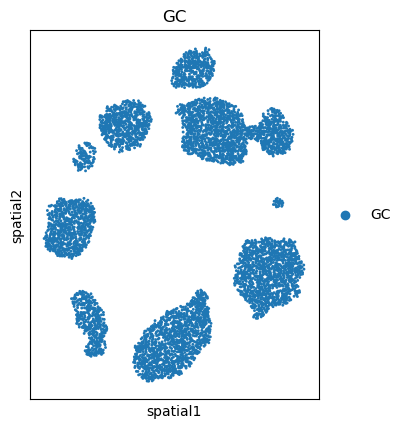

In [10]:
# Let's try easier way
adata_d21_gcs = adata_d21[adata_d21.obs['GC'] == "GC"]
sc.pl.spatial(adata_d21_gcs, color = "GC",spot_size=30,show=False)

/home/sj657/miniconda3/envs/c2l_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


[<Axes: title={'center': 'DBSCAN_labels'}, xlabel='spatial1', ylabel='spatial2'>]

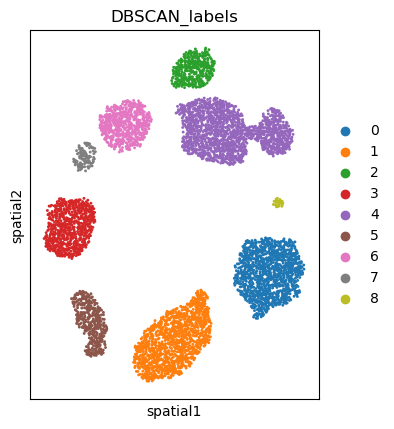

In [11]:
# DBSCAN to segregate the GC
from sklearn.cluster import DBSCAN

# Assuming spatial_data is adata_d21_gcs.obsm['spatial']
spatial_data = adata_d21_gcs.obsm['spatial']

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=60, min_samples=10).fit(spatial_data)

# Get the cluster labels
labels = dbscan.labels_

# Add the DBSCAN labels to your AnnData object
adata_d21_gcs.obs['DBSCAN_labels'] = labels.astype(str)

# Visualize the DBSCAN clustering
sc.pl.spatial(adata_d21_gcs, color='DBSCAN_labels', spot_size=30, show=False)

/home/sj657/miniconda3/envs/c2l_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


[<Axes: title={'center': 'GC_index'}, xlabel='spatial1', ylabel='spatial2'>]

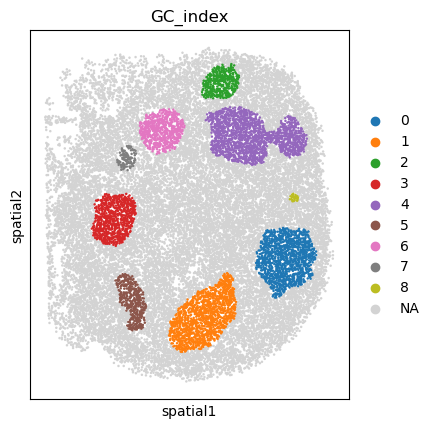

In [12]:
adata_d21.obs['GC_index'] = adata_d21_gcs.obs['DBSCAN_labels']
# Visualize the DBSCAN clustering
sc.pl.spatial(adata_d21, color='GC_index', spot_size=30, show=False)

In [13]:
# output
adata_d21.write_h5ad("../output_files/objects/adata_D21PI_wGC_raw.h5ad")

## D10PI

/tmp/ipykernel_965432/483068173.py:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_d10.obs['GC'] = adata_d10_gst.obs['Germinal_Center2']
/home/sj657/miniconda3/envs/c2l_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


[<Axes: xlabel='spatial1', ylabel='spatial2'>]

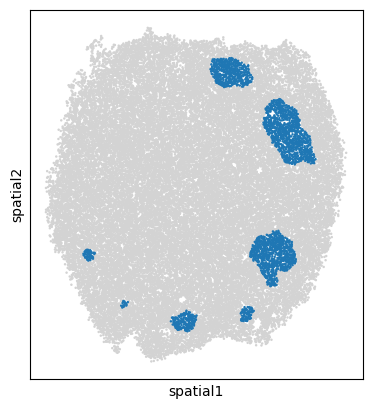

In [14]:
# get the adata gc1 raw
adata_d10_gst = sc.read_h5ad("../output_files/objects/GraphST_objects/adata_D10_GraphST_leiden.h5ad")
adata_d10 = adata_comb[adata_comb.obs['Sample']=="D10PI"]
# use Germinal_Center2
adata_d10.obs.index = adata_d10.obs['barcode']
adata_d10.obs['GC'] = adata_d10_gst.obs['Germinal_Center2']
sc.pl.spatial(adata_d10, color = 'GC',title='',spot_size=35,show=False,legend_loc=None)

/tmp/ipykernel_965432/534264470.py:13: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_d10_gcs.obs['DBSCAN_labels'] = labels.astype(str)
/home/sj657/miniconda3/envs/c2l_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/sj657/miniconda3/envs/c2l_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


[<Axes: title={'center': 'GC_index'}, xlabel='spatial1', ylabel='spatial2'>]

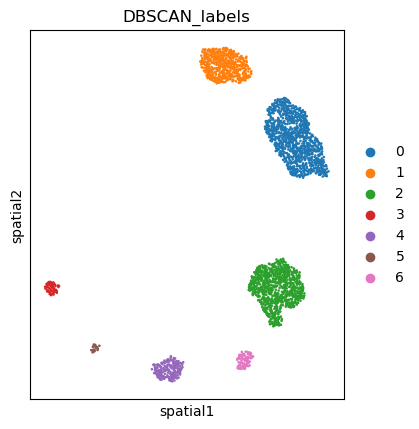

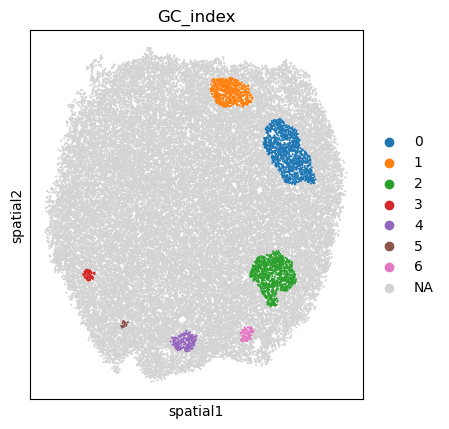

In [15]:
# cluster to extract the GC
# DBSCAN
adata_d10_gcs = adata_d10[adata_d10.obs['GC'] == "GC"]
# sc.pl.spatial(adata_d21_gcs, color = "GC",spot_size=30,show=False)
from sklearn.cluster import DBSCAN
# Assuming spatial_data is adata_d21_gcs.obsm['spatial']
spatial_data = adata_d10_gcs.obsm['spatial']
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=60, min_samples=10).fit(spatial_data)
# Get the cluster labels
labels = dbscan.labels_
# Add the DBSCAN labels to your AnnData object
adata_d10_gcs.obs['DBSCAN_labels'] = labels.astype(str)
# Visualize the DBSCAN clustering
sc.pl.spatial(adata_d10_gcs, color='DBSCAN_labels', spot_size=30, show=False)

adata_d10.obs['GC_index'] = adata_d10_gcs.obs['DBSCAN_labels']
# Visualize the DBSCAN clustering
sc.pl.spatial(adata_d10, color='GC_index', spot_size=30, show=False)

In [16]:
# save output
adata_d10.write_h5ad("../output_files/objects/adata_D10PI_wGC_raw.h5ad")

## Save all the GCs

In [17]:
adata_gc_dict = {}
# D14, GC1 & GC3
# GC1
adata_gc1 = adata_d14[(adata_d14.obs['x']> 2200) & (adata_d14.obs['x']< 3200)]
adata_gc1 = adata_gc1[(adata_gc1.obs['y']> 1370) & (adata_gc1.obs['y']< 2324)]
adata_gc1 = adata_gc1[(adata_gc1.obs['GC_index']!="GC2") & (adata_gc1.obs['GC_index']!="GC6")]
adata_gc_dict['D14PI_GC1'] = adata_gc1
# GC3
adata_gc3 = adata_d14[(adata_d14.obs['x']> 2100) & (adata_d14.obs['x']< 3200)]
adata_gc3 = adata_gc3[(adata_gc3.obs['y']> 3200) & (adata_gc3.obs['y']< 3900)]
adata_gc_dict['D14PI_GC3'] = adata_gc3
# D21, GC0,3,4
# GC0
adata_gc0 = adata_d21[(adata_d21.obs['y']> 2700) & (adata_d21.obs['y']< 3800)]
adata_gc0 = adata_gc0[(adata_gc0.obs['x']> 3100) & (adata_gc0.obs['x']< 4200)]
adata_gc_dict['D21PI_GC0'] = adata_gc0
# GC3
adata_gc3 = adata_d21[(adata_d21.obs['y']> 2400) & (adata_d21.obs['y']< 3200)]
adata_gc3 = adata_gc3[(adata_gc3.obs['x']> 1100) & (adata_gc3.obs['x']< 2000)]
adata_gc_dict['D21PI_GC3'] = adata_gc3
## GC4
adata_gc4 = adata_d21[(adata_d21.obs['y']> 1200) & (adata_d21.obs['y']< 2400)]
adata_gc4 = adata_gc4[(adata_gc4.obs['x']> 2500) & (adata_gc4.obs['x']< 4100)]
adata_gc4 = adata_gc4[(adata_gc4.obs['GC_index']!="2")]
adata_gc_dict['D21PI_GC4'] = adata_gc4
# D10, GC0,1,2
# GC0
adata_gc0 = adata_d10[(adata_d10.obs['y']> 1000) & (adata_d10.obs['y']< 2200)]
adata_gc0 = adata_gc0[(adata_gc0.obs['x']> 4000) & (adata_gc0.obs['x']< 5050)]
adata_gc_dict['D10PI_GC0'] = adata_gc0
# GC1
adata_gc1 = adata_d10[(adata_d10.obs['y']> 400) & (adata_d10.obs['y']< 1200)]
adata_gc1 = adata_gc1[(adata_gc1.obs['x']> 3200) & (adata_gc1.obs['x']< 4200)]
adata_gc_dict['D10PI_GC1'] = adata_gc1
## GC2
adata_gc2 = adata_d10[(adata_d10.obs['y']> 2800) & (adata_d10.obs['y']< 3900)]
adata_gc2 = adata_gc2[(adata_gc2.obs['x']> 3800) & (adata_gc2.obs['x']< 4800)]
adata_gc_dict['D10PI_GC2'] = adata_gc2
# save
with open('..//output_files/objects/adata_D101421_gc_dict.pkl', 'wb') as file:
    pickle.dump(adata_gc_dict, file)

# Figures: detail spatial plots for each GC

In [18]:
# open pickle
with open('/fs/cbsuvlaminck5/workdir/sj657/lymph_node/for_public/output_files/objects/adata_D101421_gc_dict.pkl', 'rb') as file:
    adata_gc_dict = pickle.load(file)
adata_gc_dict

{'D14PI_GC1': View of AnnData object with n_obs × n_vars = 2037 × 31053
     obs: 'barcode', 'x', 'y', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'Sample', 'Index', 'S_score', 'G2M_score', 'phase', 'Celltypes_c2lLN', 'Broad_celltypes', 'Refine_celltypes', 'CD4_CD8_type', 'Bcell_subtype_c2lHTA', 'Region', 'num_ONT_reads', 'num_ONT_umi', 'num_align_reads', 'num_align_umi', 'num_TRBC_reads', 'num_TRBC_umi', 'num_TRAC_reads', 'num_TRAC_umi', 'num_IGKC_reads', 'num_IGKC_umi', 'num_IGLC_reads', 'num_IGLC_umi', 'num_IGHM_reads', 'num_IGHM_umi', 'num_IGHD_reads', 'num_IGHD_umi', 'num_IGHG1_reads', 'num_IGHG1_umi', 'num_IGHG2B_reads', 'num_IGHG2B_umi', 'num_IGHG2C_reads', 'num_IGHG2C_umi', 'num_IGHG3_reads', 'num_IGHG3_umi', 'num_IGHE_reads', 'num_IGHE_umi', 'num_IGHA_reads', 'num_IGHA_umi', 'num_clones_IGH', 'num_clones_IGK', 'num_clones_IGL', 'num_clones_TRA', 'num_clones_TRB', 'IGH_MutFreq', 'IGK_MutFreq', 'IGL_MutFreq', 'TRA_MutFreq', 'TRB_MutFreq', 'IGH_MutCou

In [186]:
ref_color_dict = {"B_plasma": "#AE05D2", #purple
              "B_GC": "#FFA64B", # like pink
              "B_Mem": "#0028FF", #deep blue
              "B_Naive": "#008DFF", #light green
              "B_Act_Naive": "#8769D0", #light green
              "T_CD4_Cycling": "#006745", #green
              "T_CD4": "#00A175",
              "T_CD8_Cycling": "#9BB0A5",
              "T_CD8": "#7A7B1B",
              "NK_ILC":"#5B5295",
              "Macrophage": "#DF1F1F",
              "Monocytes":"#C24F76",
              "DCs": "#FF6F48",
              "FDC":"#000000",
              "VSMC": "#7E5500",
              "Endo": "#843200",
              "Adipocytes": "#792E57"
             }

int_genes = ['Aicda','Cxcl13','Cxcr5','Cxcl12','Cxcr4', # GC marker
'Bcl2','Lmo2','Bcl2a1b','Mfge8', # LZ marker
'Irf4','Prdm1','Xbp1', # PC marker
'Pdgfra','Selplg','Bst2','Tnfsf13', # pre-PC marker
             'Mzb1','Edem1','Man1b1', 'Ddost',
'G2M_score','S_score'
]

## Plot codes

In [ ]:
# make a for loop
gc_ind_list = adata_gc_dict.keys()
# tp = "D10PI"
for gi, adata_gc_tmp in adata_gc_dict.items():
    gc_ind = gi
    print(gc_ind)

    folder_name = f'figures/Individual_GCs/{gc_ind}'
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)

    fontprops = fm.FontProperties(size=6)
    sc.settings.set_figure_params(dpi=500, dpi_save= 500, fontsize=12, facecolor='white', frameon=False, figsize=(1, 1), vector_friendly = False, transparent=True, format="pdf")
    global_min_x, global_max_x, global_min_y, global_max_y = float('inf'), float('-inf'), float('inf'), float('-inf')
    adata = adata_gc_tmp.copy()
    coords = adata.obsm['spatial']
    global_min_x, global_max_x = min(global_min_x, coords[:, 0].min()), max(global_max_x, coords[:, 0].max())
    global_min_y, global_max_y = min(global_min_y, coords[:, 1].min()), max(global_max_y, coords[:, 1].max())

    # Optional padding
    padding = 50
    global_min_x -= padding
    global_max_x += padding
    global_min_y -= padding
    global_max_y += padding
    # Celltype and GC for boundary
    for g in ['Refine_celltypes','GC']:
        if g == "Refine_celltypes":
            fig, ax = plt.subplots(1,1, figsize = (1,1))
            sc.pl.spatial(adata, color = g,title='',spot_size=30,show=False,legend_loc=None,palette=ref_color_dict,ax = ax,vmin=0,vmax = 'p99.2')
        else:
            fig, ax = plt.subplots(1,1, figsize = (1,1))
            sc.pl.spatial(adata, color = g,title='',spot_size=30,show=False,legend_loc=None,ax = ax)
        # Set consistent axes limits
        ax.set_xlim(global_min_x, global_max_x)
        ax.set_ylim(global_max_y, global_min_y)
        ax.set_aspect('equal', adjustable='box')

        # add the scale bar
        scalebar = AnchoredSizeBar(ax.transData, 1.54*500, '', 'lower left',
                                    pad=0.5, color='black', frameon=False, size_vertical=0.5,
                                    fontproperties=fontprops)
        ax.add_artist(scalebar)
        # save
        fig_path_base = f'{folder_name}/sp_{gc_ind}_{g}'
        plt.savefig(f'{fig_path_base}.png', dpi=500, transparent=True)
        plt.savefig(f'{fig_path_base}.pdf', dpi=500, transparent=True)
        plt.close()
    # gene expression
    # basically all the figures related
    adata_gc_norm = adata_gc_tmp.copy()
    # Normalize
    sc.pp.normalize_total(adata_gc_norm, inplace=True)
    sc.pp.log1p(adata_gc_norm)
    # int_genes = ['Aicda','Cxcl13','Cxcr5','Cxcl12','Cxcr4','Bcl2','Irf4','Prdm1','Pdgfra','Selplg','Bst2','Lmo2','Bcl2a1b','G2M_score','S_score']
    for g in int_genes:
        fig, ax = plt.subplots(1,1, figsize = (1,1))
        if g in ['Cxcl13','Cxcr5','Bcl2','Lmo2','Bcl2a1b','Mfge8']:
            col = "Blues"
        else:
            col = "Reds"
        sc.pl.spatial(adata_gc_norm, color = g,title='',spot_size=30,show=False,colorbar_loc=None,cmap=col,ax = ax,vmin=0,vmax = 'p99.2')
        # Set consistent axes limits
        ax.set_xlim(global_min_x, global_max_x)
        ax.set_ylim(global_max_y, global_min_y)
        ax.set_aspect('equal', adjustable='box')

        # # add the scale bar
        # scalebar = AnchoredSizeBar(ax.transData, 1.54*500, '', 'lower left',
        #                             pad=0.5, color='black', frameon=False, size_vertical=0.5,
        #                             fontproperties=fontprops)
        # ax.add_artist(scalebar)
        # save
        fig_path_base = f'{folder_name}/sp_{gc_ind}_{g}'
        plt.savefig(f'{fig_path_base}.png', dpi=500, transparent=True)
        plt.savefig(f'{fig_path_base}.pdf', dpi=500, transparent=True)
        plt.close()
        # plot with legend
        fig, ax = plt.subplots(1,1, figsize = (1,1))
        sc.pl.spatial(adata_gc_norm, color = g,title='',spot_size=30,show=False,cmap=col,ax = ax,vmin=0,vmax = 'p99.2')
        fig_path_base = f'{folder_name}/sp_{gc_ind}_{g}_Legend'
        plt.savefig(f'{fig_path_base}.png', dpi=500, transparent=True)
        plt.savefig(f'{fig_path_base}.pdf', dpi=500, transparent=True)
        plt.close()
    # LR-feature
    lr_features = ['num_clones_IGH','num_clones_IGK','num_clones_IGL','num_clones_TRB']
    for g in lr_features:
        fig, ax = plt.subplots(1,1, figsize = (1,1))
        ### fine tune
        if g == "num_clones_IGH":
            col = "viridis";vmax = 4;vmin=1
        elif g == "num_clones_TRB":
            col = "viridis";vmax = 1
        elif g == "num_clones_IGK":
            col = "viridis";vmax = 7;vmin=1
        elif g == "num_clones_IGL":
            col = "viridis";vmax = 2;vmin=1
        sc.pl.spatial(adata, color = g,title='',spot_size=30,show=False,colorbar_loc=None,cmap=col,ax = ax,vmin=vmin,vmax = vmax)
        # Set consistent axes limits
        ax.set_xlim(global_min_x, global_max_x)
        ax.set_ylim(global_max_y, global_min_y)
        ax.set_aspect('equal', adjustable='box')

        # # add the scale bar
        # scalebar = AnchoredSizeBar(ax.transData, 1.54*500, '', 'lower left',
        #                             pad=0.5, color='black', frameon=False, size_vertical=0.5,
        #                             fontproperties=fontprops)
        # ax.add_artist(scalebar)
        # save
        fig_path_base = f'{folder_name}/sp_{gc_ind}_{g}'
        plt.savefig(f'{fig_path_base}.png', dpi=500, transparent=True)
        plt.savefig(f'{fig_path_base}.pdf', dpi=500, transparent=True)
        plt.close()
        # plot with legend
        fig, ax = plt.subplots(1,1, figsize = (1,1))
        sc.pl.spatial(adata, color = g,title='',spot_size=30,show=False,cmap=col,ax = ax,vmin=vmin,vmax = vmax)
        fig_path_base = f'{folder_name}/sp_{gc_ind}_{g}_Legend'
        plt.savefig(f'{fig_path_base}.png', dpi=500, transparent=True)
        plt.savefig(f'{fig_path_base}.pdf', dpi=500, transparent=True)
        plt.close()
    # ## another
    lr_features = ['IGH_MutCount','IGH_MutFreq','IGK_MutCount','IGK_MutFreq','IGL_MutCount','IGL_MutFreq','IGH_CDR3Len','num_IGHG_umi','num_IGHM_umi']
    # lr_features = ['IGH_MutCount','IGH_MutFreq','IGK_MutCount','IGK_MutFreq','IGL_MutCount','IGL_MutFreq','IGH_CDR3Len']
    for g in lr_features:
        fig, ax = plt.subplots(1,1, figsize = (1,1))
        ### fine tune
        if "IGH" in g:
            print(g)
            # convert NA in num_clones_IGH to the same as in g column
            adata.obs[g] = adata.obs[g].where(~adata.obs["num_clones_IGH"].isna(), other = np.nan)
            col = "viridis";vmax = 4;vmin=0
            if g == "IGH_CDR3Len":
                col = "plasma_r";vmax =20;vmin=10
            elif g == "num_IGHG_umi":
                col = 'magma_r';vmin=0;vmax=3
                # # convert 0 to NA
                adata.obs[g].replace(0, np.nan, inplace=True)
            elif g == 'num_IGHM_umi':
                col = 'magma_r';vmin=0;vmax=2
                # # convert 0 to NA
                adata.obs[g].replace(0, np.nan, inplace=True)
        elif "IGK" in g:
            # convert NA in num_clones_IGH to the same as in g column
            adata.obs[g] = adata.obs[g].where(~adata.obs["num_clones_IGK"].isna(), other = np.nan)
            col = "viridis";vmax = 1
        elif "IGL" in g:
            # convert NA in num_clones_IGH to the same as in g column
            adata.obs[g] = adata.obs[g].where(~adata.obs["num_clones_IGL"].isna(), other = np.nan)
            col = "viridis";vmax = 7;vmin=1
        
        if "Mut" in g:
            col = "plasma";vmax ='p99.2';vmin=0
        # sc.pl.spatial(adata, color = g,title='',spot_size=30,show=False,colorbar_loc=None,cmap=col,ax = ax,vmin=vmin,vmax = vmax)
        print(f'{g}_{col}_{vmin}_{vmax}')
        sc.pl.spatial(adata, color = g,title='',spot_size=30,show=False,colorbar_loc=None,cmap=col,ax = ax,vmin=vmin,vmax = vmax) 
        # Set consistent axes limits
        ax.set_xlim(global_min_x, global_max_x)
        ax.set_ylim(global_max_y, global_min_y)
        ax.set_aspect('equal', adjustable='box')

        # # add the scale bar
        # scalebar = AnchoredSizeBar(ax.transData, 1.54*500, '', 'lower left',
        #                             pad=0.5, color='black', frameon=False, size_vertical=0.5,
        #                             fontproperties=fontprops)
        # ax.add_artist(scalebar)
        # save
        fig_path_base = f'{folder_name}/sp_{gc_ind}_{g}'
        plt.savefig(f'{fig_path_base}.png', dpi=500, transparent=True)
        plt.savefig(f'{fig_path_base}.pdf', dpi=500, transparent=True)
        plt.close()
        # plot with legend
        fig, ax = plt.subplots(1,1, figsize = (1,1))
        # sc.pl.spatial(adata, color = g,title='',spot_size=30,show=False,cmap=col,ax = ax,vmin=vmin,vmax = vmax)
        sc.pl.spatial(adata, color = g,title='',spot_size=30,show=False,cmap=col,ax = ax,vmin=vmin,vmax = vmax)
        fig_path_base = f'{folder_name}/sp_{gc_ind}_{g}_Legend'
        plt.savefig(f'{fig_path_base}.png', dpi=500, transparent=True)
        plt.savefig(f'{fig_path_base}.pdf', dpi=500, transparent=True)
        plt.close()
    ## mem/sec
    tmp_obs = adata_gc_tmp.obs.copy()
    selected_columns = tmp_obs.filter(regex = r'^IGH.*_[MS]_(CDR3|CS)$').columns
    tmp_obs = tmp_obs[selected_columns]
    tmp_obs.fillna(0,inplace=True)
    tmp_obs['IGH_M_CDR3_count'] = tmp_obs.filter(regex = r'^IGH.*_M_CDR3$').sum(axis=1)
    tmp_obs['IGH_S_CDR3_count'] = tmp_obs.filter(regex = r'^IGH.*_S_CDR3$').sum(axis=1)
    tmp_obs['IGH_M_CS_count'] = tmp_obs.filter(regex = r'^IGH.*_M_CS$').sum(axis=1)
    tmp_obs['IGH_S_CS_count'] = tmp_obs.filter(regex = r'^IGH.*_S_CS$').sum(axis=1)
    mem_sec_columns = ['IGH_M_CDR3_count','IGH_S_CDR3_count','IGH_M_CS_count','IGH_S_CS_count']
    # make 0 to NA
    tmp_obs.replace(0, np.nan, inplace=True)
    adata.obs[mem_sec_columns] = tmp_obs[mem_sec_columns]

    # Try add scale bar
    # g = "Aicda"
    lr_features = mem_sec_columns
    for g in lr_features:
        fig, ax = plt.subplots(1,1, figsize = (1,1))

        # # convert 0 to NA
        # adata.obs[g].replace(0, np.nan, inplace=True)
        # convert NA in num_clones_IGH to the same as in g column
        if "CDR3" in g:
            adata.obs[g] = adata.obs[g].where(~adata.obs["num_clones_IGH"].isna(), other = np.nan)
            # ### fine tune
            if "M_CDR3" in g:
                # col = 'magma';vmin=1;vmax=4
                col = 'magma_r';vmin=0;vmax=4
            elif "S_CDR3" in g:
                # col = 'magma';vmin=1;vmax=30
                col = 'magma_r';vmin=0;vmax=4
        if "CS" in g:
            adata.obs[g] = adata.obs[g].where(~adata.obs["num_clones_IGH"].isna(), other = np.nan)
            # ### fine tune
            if "M_CS" in g:
                # col = 'magma';vmin=1;vmax=4
                col = 'magma_r';vmin=0;vmax=4
            elif "S_CS" in g:
                # col = 'magma';vmin=1;vmax=30
                col = 'magma_r';vmin=0;vmax=10
        sc.pl.spatial(adata, color = g,title='',spot_size=30,show=False,colorbar_loc=None,cmap=col,ax = ax,vmin=vmin,vmax = vmax)
        # Set consistent axes limits
        ax.set_xlim(global_min_x, global_max_x)
        ax.set_ylim(global_max_y, global_min_y)
        ax.set_aspect('equal', adjustable='box')
        # save
        fig_path_base = f'{folder_name}/sp_{gc_ind}_{g}'
        plt.savefig(f'{fig_path_base}.png', dpi=500, transparent=True)
        plt.savefig(f'{fig_path_base}.pdf', dpi=500, transparent=True)
        plt.close()
        # plot with legend
        fig, ax = plt.subplots(1,1, figsize = (1,1))
        sc.pl.spatial(adata, color = g,title='',spot_size=30,show=False,cmap=col,ax = ax,vmin=vmin,vmax = vmax)
        fig_path_base = f'{folder_name}/sp_{gc_ind}_{g}_Legend'
        plt.savefig(f'{fig_path_base}.png', dpi=500, transparent=True)
        plt.savefig(f'{fig_path_base}.pdf', dpi=500, transparent=True)
        plt.close()

## Fig: Plot clones passing through the GC

### D14PI_GC1: CID

In [ ]:
cids = ['83','93','97','120','204','205','240','241','276']
adata = adata_gc_dict['D14PI_GC1'].copy()
adata.obs.index = adata.obs['Index']
exp = "D14";ir = "IGH";gci = "GC1"
# read the cln dataframe
fn = "../output_files/Mixcr_results/Mixcr_results_"+exp+"/"+exp+"_ovp_clone_table.txt"
cid_df = pd.read_csv(fn,sep="\t")
cid_df[['barcode','receptor_type',"aaSeqCDR3","cloneId"]] = cid_df[['barcode','receptor_type',"aaSeqCDR3","cloneId"]].astype("string")
# ovp with filtered data
cid_df = cid_df.loc[cid_df['barcode'].isin(adata.obs['barcode'])]
# get the occurance table
cid_df = cid_df.loc[cid_df['receptor_type']==ir][["cloneId","barcode","clono_type","receptor_type"]]
print(cid_df.shape)
cid_df = cid_df.drop_duplicates() # get number of unique barcodes
print(cid_df.shape)
occ = cid_df['cloneId'].value_counts().reset_index()
occ.columns = ['cloneId',"Count"]
print(occ.shape)
cid_tmp = pd.read_csv(fn,sep="\t")
# check if cids all in occ
print(sum(occ['cloneId'].isin(cids)))
# plot them all 
adata.obs['cdr3'] = adata.obs['GC'].astype(str)
simp_tmp_df = cid_df.loc[cid_df.cloneId.isin(cids)][['barcode','cloneId']]
print(simp_tmp_df.shape)
# drop duplicates
# simp_tmp_df = simp_tmp_df.drop_duplicates(subset="barcode")
simp_tmp_df = simp_tmp_df.drop_duplicates(subset="barcode") # a same barcode would have multiple copies in cloneId
print(simp_tmp_df.shape)
bbb = simp_tmp_df['barcode'].tolist()
adata.obs = pd.merge(adata.obs, simp_tmp_df, on = "barcode", how = "left")
adata.obs.loc[(adata.obs["barcode"].isin(bbb)),"cdr3"] = adata.obs['cloneId']
# make NA
adata.obs['cdr3'].replace("nan", np.nan, inplace = True)
# order the anndata
tmp_ind = tmp_ind = adata.obs[(adata.obs['cdr3'] != "GC") & (~adata.obs['cdr3'].isna())].index
gc_ind = adata.obs[(adata.obs['cdr3'] == "GC") | (adata.obs['cdr3'].isna())].index
filename = f"sp_{exp}PI_{gci}_multiclones_across.pdf"
# make the color same as GC
color_dict = adata.obs.cdr3.value_counts().to_dict()
cmap = plt.get_cmap('Set1')
num_cids = len(cids)
colors = [cmap(i / num_cids) for i in range(num_cids)]
colors = [mcolors.rgb2hex(color) for color in colors]
# fill up the remaining colors
color_dict['GC'] = "#0081FF"
color_dict.update({val: colors[i] for i, val in enumerate(cids)})
sc.settings.set_figure_params(dpi=500, dpi_save= 500, facecolor='white', frameon=False, figsize=(2, 2),fontsize=8,vector_friendly=True, transparent=True, format="pdf")
sc.settings.figdir = f"figures/individual_GCs/D14PI_{gci}/"
fig = plt.figure(figsize = (2,2))
ax = plt.gca()
# GC first
sc.pl.spatial(adata[gc_ind,:], color = 'GC',spot_size=50,ax = ax,na_in_legend=False,legend_loc="None",title="",show=False,sort_order=True,palette=color_dict) # plot on top with the clone; need to reorder the indicis
# plot in 
sc.pl.spatial(adata[tmp_ind,:], color = 'cdr3',spot_size=50,ax = ax,na_in_legend=False,legend_loc="None",title="",show=False,sort_order=True,palette=color_dict)
# plt.savefig(filename+'.png',dpi = 500,transparent=True)
plt.savefig(filename,dpi = 500,transparent=True)

#### D21PI_GC3: CID:

In [ ]:
cids = ['34','48','62','77','115','125','127','139','150','161','185','229']
adata = adata_gc_dict['D21PI_GC3'].copy()
adata.obs.index = adata.obs['Index']
exp = "D21";ir = "IGH";gci = "GC3"
# read the cln dataframe
fn = "../output_files/Mixcr_results/Mixcr_results_"+exp+"/"+exp+"_ovp_clone_table.txt"
cid_df = pd.read_csv(fn,sep="\t")
cid_df[['barcode','receptor_type',"aaSeqCDR3","cloneId"]] = cid_df[['barcode','receptor_type',"aaSeqCDR3","cloneId"]].astype("string")
# ovp with filtered data
cid_df = cid_df.loc[cid_df['barcode'].isin(adata.obs['barcode'])]
# get the occurance table
cid_df = cid_df.loc[cid_df['receptor_type']==ir][["cloneId","barcode","clono_type","receptor_type"]]
print(cid_df.shape)
cid_df = cid_df.drop_duplicates() # get number of unique barcodes
print(cid_df.shape)
occ = cid_df['cloneId'].value_counts().reset_index()
occ.columns = ['cloneId',"Count"]
print(occ.shape)
cid_tmp = pd.read_csv(fn,sep="\t")
# check if cids all in occ
print(sum(occ['cloneId'].isin(cids)))
# plot them all 
adata.obs['cdr3'] = adata.obs['GC'].astype(str)
simp_tmp_df = cid_df.loc[cid_df.cloneId.isin(cids)][['barcode','cloneId']]
print(simp_tmp_df.shape)
# drop duplicates
# simp_tmp_df = simp_tmp_df.drop_duplicates(subset="barcode")
simp_tmp_df = simp_tmp_df.drop_duplicates(subset="barcode") # a same barcode would have multiple copies in cloneId
print(simp_tmp_df.shape)
bbb = simp_tmp_df['barcode'].tolist()
adata.obs = pd.merge(adata.obs, simp_tmp_df, on = "barcode", how = "left")
adata.obs.loc[(adata.obs["barcode"].isin(bbb)),"cdr3"] = adata.obs['cloneId']
# make NA
adata.obs['cdr3'].replace("nan", np.nan, inplace = True)
# order the anndata
tmp_ind = tmp_ind = adata.obs[(adata.obs['cdr3'] != "GC") & (~adata.obs['cdr3'].isna())].index
gc_ind = adata.obs[(adata.obs['cdr3'] == "GC") | (adata.obs['cdr3'].isna())].index
filename = f"sp_{exp}PI_{gci}_multiclones_across.pdf"
# make the color same as GC
color_dict = adata.obs.cdr3.value_counts().to_dict()
cmap1 = plt.get_cmap('Set1')
cmap2 = plt.get_cmap('Set2')
# cmap = cmap1 + cmap2
num_cids = len(cids)
# Determine how many colors to take from each colormap
num_colors_cmap1 = num_cids // 2
num_colors_cmap2 = num_cids - num_colors_cmap1
# Extract colors from 'Set1'
colors_cmap1 = [cmap1(i / max(num_colors_cmap1 - 1, 1)) for i in range(num_colors_cmap1)]
# Extract colors from 'Set2'
colors_cmap2 = [cmap2(i / max(num_colors_cmap2 - 1, 1)) for i in range(num_colors_cmap2)]
# Combine colors from both colormaps
colors = colors_cmap1 + colors_cmap2
# Convert colors to hex format
hex_colors = [mcolors.rgb2hex(color) for color in colors]
# fill up the remaining colors
color_dict['GC'] = "#0081FF"
color_dict.update({val: hex_colors[i] for i, val in enumerate(cids)})
sc.settings.set_figure_params(dpi=500, dpi_save= 500, facecolor='white', frameon=False, figsize=(2, 2),fontsize=8,vector_friendly=True, transparent=True, format="pdf")
sc.settings.figdir = f"figures/individual_GCs/figures/D14PI_{gci}/"
fig = plt.figure(figsize = (2,2))
ax = plt.gca()
# GC first
sc.pl.spatial(adata[gc_ind,:], color = 'GC',spot_size=50,ax = ax,na_in_legend=False,legend_loc="None",title="",show=False,sort_order=True,palette=color_dict) # plot on top with the clone; need to reorder the indicis
# plot in 
sc.pl.spatial(adata[tmp_ind,:], color = 'cdr3',spot_size=50,ax = ax,na_in_legend=False,legend_loc="None",title="",show=False,sort_order=True,palette=color_dict)
# plt.savefig(filename+'.png',dpi = 500,transparent=True)
plt.savefig(filename,dpi = 500,transparent=True)


# Fig 6 workflow: Assign the clones to GC by clustering 

In [23]:
adata_d14 = sc.read_h5ad("../output_files/objects/adata_D14PI_wGC_raw.h5ad")
adata_d21 = sc.read_h5ad("../output_files/objects/adata_D21PI_wGC_raw.h5ad")
adata_d10 = sc.read_h5ad("../output_files/objects/adata_D10PI_wGC_raw.h5ad")
# Add 'GC' to GC_index
adata_d21.obs['GC_index'] = 'GC' + adata_d21.obs['GC_index'].astype(str)
adata_d10.obs['GC_index'] = 'GC' + adata_d10.obs['GC_index'].astype(str)
adata_d21.obs.loc[adata_d21.obs['GC_index']=='GCnan','GC_index'] = 'nan'
adata_d10.obs.loc[adata_d10.obs['GC_index']=='GCnan','GC_index'] = 'nan'
adata_dict = dict()
adata_dict['D14PI'] = adata_d14
adata_dict['D21PI'] = adata_d21
adata_dict['D10PI'] = adata_d10
# Counts_CID table
cid_dict = dict()
#D14
cid_tmp = pd.read_csv("../output_files/D14_ovp_clone_table.txt",sep="\t")
cid_tmp[['barcode','receptor_type',"aaSeqCDR3"]] = cid_tmp[['barcode','receptor_type',"aaSeqCDR3"]].astype("string")
cid_dict['D14PI'] = cid_tmp
#D21
cid_tmp = pd.read_csv("../output_files/D21_ovp_clone_table.txt",sep="\t")
cid_tmp[['barcode','receptor_type',"aaSeqCDR3"]] = cid_tmp[['barcode','receptor_type',"aaSeqCDR3"]].astype("string")
cid_dict['D21PI'] = cid_tmp
#D10
cid_tmp = pd.read_csv("../output_files/D10_ovp_clone_table.txt",sep="\t")
cid_tmp[['barcode','receptor_type',"aaSeqCDR3"]] = cid_tmp[['barcode','receptor_type',"aaSeqCDR3"]].astype("string")
cid_dict['D10PI'] = cid_tmp
# Productive Clone ID table
cln_dict = dict()
# D14
cln_tmp = pd.read_csv("../output_files/D14PI_IGH_clones_All_productive.csv")
cln_dict['D14PI'] = cln_tmp
# D21
cln_tmp = pd.read_csv("../output_files/D21PI_IGH_clones_All_productive.csv")
cln_dict['D21PI'] = cln_tmp
# D10
cln_tmp = pd.read_csv("../output_files/D10PI_IGH_clones_All_productive.csv")
cln_dict['D10PI'] = cln_tmp
# assigned dict
cln_assigned_df = cln_dict.copy()

/tmp/ipykernel_965432/2015409549.py:20: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  cid_tmp = pd.read_csv("../output_files/D21_ovp_clone_table.txt",sep="\t")


In [24]:
# Codes for assigning the GC
def classify_gc(row):
    gc_values = row.split(',')
    if len(gc_values) == 1:
        return 'Single GC and non-GC'
    elif len(gc_values) == 2 and 'non-GC' in gc_values:
        return 'Single GC and non-GC'
    else:
        return 'Multiple GCs'
# Applying classification function
# d10_cln_assigned['GC_type'] = d10_cln_assigned['GC_assigned'].apply(classify_gc)

# number of GC count?
def count_GCs(gc_string):
    # Split the string by commas and filter out 'non-GC'
    gc_list = [gc for gc in gc_string.split(',') if gc != 'non-GC']
    return len(gc_list)

In [ ]:
for tp in adata_dict.keys():
    print(tp)
    cid_tmp = cid_dict[tp]
    tmp_cln = cln_dict[tp]
    adata_tmp = adata_dict[tp]
    tmp_cln_assigned = cln_assigned_df[tp]
    tmp_cln_assigned['GC_assigned'] = 'nan'
    # Define the save directory path
    save_dir = f"figures/clusterGC_fig/{tp}"
    # Make sure the directory exists
    os.makedirs(save_dir, exist_ok=True)
    sc.settings.set_figure_params(dpi=500, dpi_save= 500, fontsize=6, facecolor='white', frameon=False, figsize=(1, 1), vector_friendly = False, transparent=True, format="pdf")
    sc.settings.figdir = save_dir
    for cid in tmp_cln_assigned['Clone.ID'].unique():
        print(cid)
        tmp_df = cid_tmp.loc[cid_tmp['cloneId'] == cid]
        uniq_bar = tmp_df['barcode'].unique()
        num_tmp = len(uniq_bar)  # Unique number of barcodes
        print("Number of beads:" + str(num_tmp))
        cdr3 = tmp_cln.loc[tmp_cln['Clone.ID'] == cid, 'CDR3.aa'].values[0]
        print(cdr3)
    
        if num_tmp == tmp_cln.loc[tmp_cln['Clone.ID'] == cid, 'bar_count'].values[0]:
            print("same number of beads")
        else:
            print('different number of beads')
    
        # Copy the original obs DataFrame
        adata_tmp_obs = adata_tmp.obs.copy()
        adata_tmp_obs['GC_CDR3'] = adata_tmp_obs['GC_index'].astype(str)
    
        # For the beads in uniq_bar, assign the CDR3 value to 'GC_CDR3'
        adata_tmp_obs.loc[adata_tmp_obs["barcode"].isin(uniq_bar), "GC_CDR3"] = cdr3
        adata_tmp_obs['GC_CDR3'].value_counts(dropna=False)
    
        # Remove rows where 'GC_CDR3' is 'nan'
        adata_tmp_obs = adata_tmp_obs[adata_tmp_obs['GC_CDR3'] != "nan"]
        # print(adata_tmp_obs.shape)
    
        # Create the GC data subset
        adata_gc = adata_tmp[adata_tmp.obs['barcode'].isin(adata_tmp_obs['barcode'])].copy()
        adata_gc.obs['GC_CDR3'] = adata_tmp_obs['GC_CDR3']
    
        adata_gc_cdr3 = adata_gc[adata_gc.obs['GC_CDR3'] == cdr3].copy()
        adata_gc_only = adata_gc[adata_gc.obs['GC_CDR3'] != cdr3].copy()
        
        # Coordinates of GC points and unlabeled points (blue dots)
        gc_coords = adata_gc_only.obsm['spatial'] # the one not cdr3
        gc_labels = adata_gc_only.obs['GC_CDR3'].values
    
    
        cdr3_coords = adata_gc_cdr3.obsm['spatial']
    
        # Find the nearest GC cluster for each unlabeled point
        distances = cdist(cdr3_coords, gc_coords) 
        nearest_idx = np.argmin(distances, axis=1)
        nearest_distances = np.min(distances, axis=1)
        # Set a maximum distance threshold for GC assignment
        max_distance = 100 # um
        pix_max_distance = max_distance * 1.54
        assigned_labels = []
    
        # Assign labels based on the distance threshold
        for i in range(len(nearest_distances)):
            if nearest_distances[i] <= pix_max_distance:
                assigned_labels.append(gc_labels[nearest_idx[i]])
            else:
                assigned_labels.append("non-GC")
    
        # Assign the closest GC label to each unlabeled point
        adata_gc_cdr3.obs['GC_CDR3'] = assigned_labels
        adata_gc_cdr3.obs['GC_CDR3'] = adata_gc_cdr3.obs['GC_CDR3'].astype(str)
        # get the assigned labels back to the d21_cln
        tmp_cln_assigned.loc[tmp_cln_assigned['Clone.ID']==cid,'GC_assigned'] = ",".join(set(assigned_labels))
        # Concatenate labeled and newly labeled data
        adata_gc_only.obs['GC_CDR3'] = "GC"
        adata_combined = adata_gc_only.concatenate(adata_gc_cdr3)
        adata_combined.obs['GC_CDR3'] = adata_combined.obs['GC_CDR3'].astype(str)
        # Save the spatial visualization of the updated data for each Clone ID
        # Plot the spatial visualization with updated labels and save it
        if num_tmp >= 5:
            try:
                # sc.pl.spatial(adata_gc_cdr3, color='GC_CDR3', title='', spot_size=60, show=False,save=f"CloneID_{cid}_GC_CDR3.png")
                sc.pl.spatial(adata_combined, color='GC_CDR3', title='', spot_size=60, show=False,save=f'CloneID_{cid}_Combined.png')
            except Exception as e:
                print(f"An error occurred with Clone ID {cid}: {e}")
                continue
                
    # Get Assigned sort out
    tmp_cln_assigned['GC_type'] = tmp_cln_assigned['GC_assigned'].apply(classify_gc)
    tmp_cln_assigned['num_of_GCs'] = tmp_cln_assigned['GC_assigned'].apply(count_GCs)
    cln_assigned_df[tp] = tmp_cln_assigned.copy()
    # Figures
    counts = tmp_cln_assigned['GC_type'].value_counts()
    # Plotting the barplot
    plt.figure(figsize=(1, 1.5))
    plt.bar(counts.index, counts.values, color=['blue', 'green', 'red'])
    plt.xlabel('',fontsize = 4)
    plt.ylabel('Count',fontsize = 4)
    plt.title(f'{tp} composition of clones from GC',fontsize = 4)
    plt.xticks(rotation=90,fontsize = 3)
    plt.grid(False)
    plt.tight_layout()
    plt.show()

    counts = tmp_cln_assigned['num_of_GCs'].value_counts()
    plt.figure(figsize=(1, 1.5))
    plt.bar(counts.index, counts.values)
    plt.xlabel('',fontsize = 4)
    plt.ylabel('Count',fontsize = 4)
    plt.title(f'{tp} composition of clones from GC',fontsize = 4)
    plt.xticks(rotation=90,fontsize = 3)
    plt.grid(False)
    plt.tight_layout()
    plt.show()

In [ ]:
for tp in adata_dict.keys():
    tmp_cln_assigned = cln_assigned_df[tp]
    # output
    tmp_cln_assigned.to_csv(f"../output_files/{tp}_IGH_clones_All_productive_multiple_GC_assigned.csv",index=False)
    # Figures
    counts = tmp_cln_assigned['GC_type'].value_counts()
    # Plotting the barplot
    plt.figure(figsize=(1, 1.5))
    plt.bar(counts.index, counts.values, color=['blue', 'green', 'red'])
    plt.xlabel('',fontsize = 4)
    plt.ylabel('Count',fontsize = 4)
    plt.title(f'{tp} composition of clones from GC',fontsize = 4)
    plt.xticks(rotation=90,fontsize = 3)
    plt.grid(False)
    plt.tight_layout()
    plt.show()

    counts = tmp_cln_assigned['num_of_GCs'].value_counts()
    plt.figure(figsize=(1, 1.5))
    plt.bar(counts.index, counts.values)
    plt.xlabel('',fontsize = 4)
    plt.ylabel('Count',fontsize = 4)
    plt.title(f'{tp} composition of clones from GC',fontsize = 4)
    plt.xticks(rotation=90,fontsize = 3)
    plt.grid(False)
    plt.tight_layout()
    plt.show()

# Fig: spatial plots with individual GCs

In [192]:
adata_d14 = sc.read_h5ad("../output_files/objects/adata_D14PI_wGC_raw.h5ad")
adata_d21 = sc.read_h5ad("../output_files/objects/adata_D21PI_wGC_raw.h5ad")
adata_d10 = sc.read_h5ad("../output_files/objects/adata_D10PI_wGC_raw.h5ad")
# Add 'GC' to GC_index
# adata_d21.obs['GC_index'] = 'GC' + adata_d21.obs['GC_index'].astype(str)
# adata_d10.obs['GC_index'] = 'GC' + adata_d10.obs['GC_index'].astype(str)
# adata_d21.obs.loc[adata_d21.obs['GC_index']=='GCnan','GC_index'] = 'nan'
# adata_d10.obs.loc[adata_d10.obs['GC_index']=='GCnan','GC_index'] = 'nan'

In [194]:
# plot
g = "GC_index"
sc.settings.set_figure_params(dpi=500, dpi_save= 500, fontsize=6, facecolor='white', frameon=False, figsize=(2, 2), vector_friendly = False, transparent=True, format="pdf")
sc.pl.spatial(adata_d10, color =g,cmap="Reds",spot_size=70,show=False)
# Save the plot with the name of the gene
output_filename = f"figures/clusterGC_fig/SP_D10_{g}_GC_index.pdf"
plt.savefig(output_filename, transparent=True, format='pdf')
# Close the figure to free up memory
plt.close()

sc.pl.spatial(adata_d14, color =g,cmap="Reds",spot_size=70,show=False)
# Save the plot with the name of the gene
output_filename = f"figures/clusterGC_fig/SP_D14_{g}_GC_index.pdf"
plt.savefig(output_filename, transparent=True, format='pdf')
# Close the figure to free up memory
plt.close()

sc.pl.spatial(adata_d21, color =g,cmap="Reds",spot_size=70,show=False)
# Save the plot with the name of the gene
output_filename = f"figures/clusterGC_fig/SP_D21_{g}_GC_index.pdf"
plt.savefig(output_filename, transparent=True, format='pdf')
# Close the figure to free up memory
plt.close()

/home/sj657/miniconda3/envs/c2l_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/sj657/miniconda3/envs/c2l_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/sj657/miniconda3/envs/c2l_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Cate

# Smoothie on GCs

In [30]:
print("Importing matplotlib.pyplot...", end = '')
import matplotlib.pyplot as plt
print(" done :)")
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D
import os
import sys
import time
import re
print("Importing pandas...", end = '')
import pandas as pd
print(" done :)")
print("Importing seaborn...", end = '')
import seaborn as sns
print(" done :)")
print("Importing scanpy...", end = '')
import scanpy as sc
print(" done :)")
import numpy as np
import scipy.spatial as scisp
import math
import anndata as ad
# import plotly.graph_objects as go
import scanpy.external as sce
import scipy.sparse as sp

from gaussian_smoothing_functions import *

Importing matplotlib.pyplot... done :)
Importing pandas... done :)
Importing seaborn... done :)
Importing scanpy... done :)


In [ ]:
with open('/fs/cbsuvlaminck5/workdir/sj657/lymph_node/for_public/output_files/objects/adata_D101421_gc_dict.pkl', 'rb') as file:
    adata_gc_dict = pickle.load(file)
adata_gc_dict

## Gaussian function

In [198]:
def gauss_process(adata_input=adata,gaus_sd = 100):

    ## Make grid of points and apply the grid to adata coordinates

    # find edges of grid
    max_X, min_X = adata_input.obs['x'].max(), adata_input.obs['x'].min()
    max_Y, min_Y = adata_input.obs['y'].max(), adata_input.obs['y'].min()

    # find ranges of grid
    print("Variation in X-direction: " + str(max_X - min_X))
    print("Variation in Y-direction: " + str(max_Y - min_Y))


    # CHOOSE: define the square grid size
    GRID_SIZE = (max_X - min_X) / 200
    # CHOOSE: shift alternating rows by 1/2 grid size to make hexagonal arrangement?
    IS_HEX_GRID = True

    # generate grid
    adata_grid = make_grid2(max_X, min_X, max_Y, min_Y, GRID_SIZE, IS_HEX_GRID)


    # CHOOSE: distance threshold for including a grid point
    DIST = GRID_SIZE / 2
    # fit grid
    fit_adata_grid = fit_grid_to_adata(adata_input, adata_grid, DIST)

    # find point count in unfit grid
    print("Number of points in grid: " + str(len(adata_grid)))
    # find point count in fit grid
    print("Number of points in fitted grid: " + str(len(fit_adata_grid)))

    # from gaussian_smoothing_functions import *

    ## Run grid-based guassian and partial gaussian smoothing

    # CHOOSE: gaussian distribution standard deviation (this determines the degree of smoothing you do)
    # GAUSSIAN_SD = gaus_sd * 1.54
    GAUSSIAN_SD = gaus_sd
    # CHOOSE: default is (3 * GAUSSIAN_SD) to retreive +/- 3 s.d. from kernel center and get 99.7% volume under distribution
    KERNEL_RADIUS = 3 * GAUSSIAN_SD

    # run apply_gauss_kernel_grid function to get smoothed gaussian
    print("Gaussian smoothing running... ", end = '')
    X_grid_sm = apply_gauss_kernel_grid(adata_input, 
                                fit_adata_grid, 
                                gaussian_kernel_height, 
                                GAUSSIAN_SD, 
                                KERNEL_RADIUS)
    print("done!")

    # run apply_gauss_kernel_grid function to get x partial gaussian derivative
    print("X partial gaussian smoothing running... ", end = '')
    X_xpartial_grid_sm = apply_gauss_kernel_grid(adata_input, 
                                        fit_adata_grid, 
                                        x_partial_gaussian_kernel_height, 
                                        GAUSSIAN_SD, 
                                        KERNEL_RADIUS)
    print("done!")

    # run apply_gauss_kernel_grid function to get y partial gaussian derivative
    print("Y partial gaussian smoothing running... ", end = '')
    X_ypartial_grid_sm = apply_gauss_kernel_grid(adata_input, 
                                        fit_adata_grid, 
                                        y_partial_gaussian_kernel_height, 
                                        GAUSSIAN_SD, 
                                        KERNEL_RADIUS)
    print("done!")

    # find the magnitude of the gradient at each point in the grid
    X_gradient_magnitude_grid = np.sqrt(X_xpartial_grid_sm**2 + X_ypartial_grid_sm**2)

    # find the direction of the gradient at each point in the grid
    X_gradient_direction_grid = np.arctan2(X_ypartial_grid_sm, X_xpartial_grid_sm)

    # construct anndata for grid_smoothed
    grid_sm_grad_adata = ad.AnnData(X_grid_sm)

    # add layers for X_smoothed, X_gradient_mag, X_gradient_dir
    grid_sm_grad_adata.layers['X_grad_mag'] = X_gradient_magnitude_grid
    grid_sm_grad_adata.layers['X_grad_dir'] = X_gradient_direction_grid

    # add spatial coordinates from fit_adata_grid
    grid_sm_grad_adata.obsm['spatial'] = fit_adata_grid
    grid_sm_grad_adata.obs['x'] = fit_adata_grid[:,0]
    grid_sm_grad_adata.obs['y'] = fit_adata_grid[:,1]

    # add all .var fields for genes from ref_adata
    grid_sm_grad_adata.var = adata_input.var.copy()
    return(grid_sm_grad_adata)

In [199]:
from scipy.stats import pearsonr, spearmanr

def pearson_correlation_GOI_vs_all(arr_1d, arr_2d):
    pcorrelations = []
    for row in arr_2d:
        pcorrelation, _ = pearsonr(arr_1d, row)
        pcorrelations.append(pcorrelation)
    return pcorrelations

def spearman_correlation_GOI_vs_all(arr_1d, arr_2d):
    scorrelations = []
    for row in arr_2d:
        scorrelation, _ = spearmanr(arr_1d, row)
        scorrelations.append(scorrelation)
    return scorrelations

# takes in arr1 and arr2, both with rows being genes, and cols being points
# returns an array with (i,j) being pearson R of arr1[i] and arr2[j]
def pearson_correlation_gene_set(arr1, arr2 = None):
    if arr2 == None:
        arr2 = arr1
        
    pcorr_2d_arr = []
    for row in arr1:
        pcorr_2d_arr.append(pearson_correlation_GOI_vs_all(row, arr2))
    return np.array(pcorr_2d_arr)  

# takes in arr1 and arr2, both with rows being genes, and cols being points
# returns an array with (i,j) being spearman R of arr1[i] and arr2[j]
def spearman_correlation_agene_set(arr1, arr2 = None):
    if arr2 == None:
        arr2 = arr1
    
    scorr_2d_arr = []
    for row in arr1:
        scorr_2d_arr.append(spearman_correlation_GOI_vs_all(row, arr2))
    return np.array(scorr_2d_arr) 

In [200]:
def calculate_goi_corr(smoothed_data, GOI):
    # Apply Gaussian smoothing
    # smoothed_data = gauss_process(adata_input = adata,gaus_sd = gaus_sd)
    # Extract the gene of interest
    smoothed_data.obs[f"GOI_{GOI}"] = smoothed_data[:, GOI].X.toarray()
    adata.var[f"{GOI}_SR"] = adata.var_names == GOI
    
    # Calculate Pearson R correlation
    goi_similarity = pearson_correlation_GOI_vs_all(
        smoothed_data.obs[f"GOI_{GOI}"], smoothed_data.X.T
    )
    
    # Create a DataFrame with genes and their correlation values
    goi_similarity_arr = np.vstack((smoothed_data.var_names, goi_similarity)).T
    goi_corr = pd.DataFrame(goi_similarity_arr, columns=["Gene", "Corr"])
    
    # Sort the DataFrame by correlation values in descending order
    goi_corr = goi_corr.sort_values(by="Corr", ascending=False)
    goi_corr = goi_corr.dropna()
    
    return goi_corr

## D14PI GC1 & D21PI GC3
Spatial autocorrelation with the num_IGH_umi

In [201]:
# D14
adata = adata_gc_dict['D14PI_GC1'].copy()
# also the IGH_S_CS_count
tmp_obs = adata.obs.copy()
selected_columns = tmp_obs.filter(regex = r'^IGH.*_[MS]_(CDR3|CS)$').columns
tmp_obs = tmp_obs[selected_columns]
tmp_obs.fillna(0,inplace=True)
tmp_obs['IGH_M_CDR3_count'] = tmp_obs.filter(regex = r'^IGH.*_M_CDR3$').sum(axis=1)
tmp_obs['IGH_S_CDR3_count'] = tmp_obs.filter(regex = r'^IGH.*_S_CDR3$').sum(axis=1)
tmp_obs['IGH_M_CS_count'] = tmp_obs.filter(regex = r'^IGH.*_M_CS$').sum(axis=1)
tmp_obs['IGH_S_CS_count'] = tmp_obs.filter(regex = r'^IGH.*_S_CS$').sum(axis=1)
adata.obs['num_IGH_S'] = tmp_obs['IGH_S_CS_count']
# convert num_IGH_umi NaN to 0
adata.obs['num_IGH_umi'] = adata.obs['num_IGH_umi'].fillna(0)
# Step 3: Integrate both 'num_IGH_umi' and 'num_IGH_S' into the X matrix
x_column_umi = adata.obs['num_IGH_umi'].values.reshape(-1, 1)
x_column_s = adata.obs['num_IGH_S'].values.reshape(-1, 1)

# Convert both to sparse format
x_sparse_umi = sp.csr_matrix(x_column_umi)
x_sparse_s = sp.csr_matrix(x_column_s)

# Horizontally stack the new columns to the original X matrix
new_x = sp.hstack([adata.X, x_sparse_umi, x_sparse_s])

# Step 4: Create the new AnnData object
new_adata = sc.AnnData(
    X=new_x,
    obs=adata.obs.copy(),  # Include updated .obs with 'num_IGH_umi' and 'num_IGH_S'
    var=pd.concat(
        [
            adata.var,
            pd.DataFrame(index=["num_IGH_umi", "num_IGH_S"])  # Add new entries for the variables
        ]
    )
)

# Step 5: Add the spatial layer
new_adata.obsm['spatial'] = adata.obsm['spatial'].copy()

# Step 6: Update adata to the new AnnData object
adata = new_adata.copy()

# Step 7: Add total counts to .var
adata.var['total_counts'] = np.sum(adata.X, axis=0).A1  # Ensure proper shape

# Step 8: Normalization (TPM + log1p)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# Step 9: Add log1p total counts to .var
adata.var['log1p_total_counts'] = np.sum(adata.X, axis=0).A1  # Ensure proper shape

# Step 10: Filter genes based on total counts
GENE_COUNT_THRESHOLD = 10
adata = adata[:, adata.var['total_counts'] >= GENE_COUNT_THRESHOLD]

# Step 11: Update .obs index to match barcode column
adata.obs.index = adata.obs['barcode']
sm_d14 = gauss_process(adata_input = adata,gaus_sd = 50)

# D21
adata = adata_gc_dict['D21PI_GC3'].copy()
# also the IGH_S_CS_count
tmp_obs = adata.obs.copy()
selected_columns = tmp_obs.filter(regex = r'^IGH.*_[MS]_(CDR3|CS)$').columns
tmp_obs = tmp_obs[selected_columns]
tmp_obs.fillna(0,inplace=True)
tmp_obs['IGH_M_CDR3_count'] = tmp_obs.filter(regex = r'^IGH.*_M_CDR3$').sum(axis=1)
tmp_obs['IGH_S_CDR3_count'] = tmp_obs.filter(regex = r'^IGH.*_S_CDR3$').sum(axis=1)
tmp_obs['IGH_M_CS_count'] = tmp_obs.filter(regex = r'^IGH.*_M_CS$').sum(axis=1)
tmp_obs['IGH_S_CS_count'] = tmp_obs.filter(regex = r'^IGH.*_S_CS$').sum(axis=1)
adata.obs['num_IGH_S'] = tmp_obs['IGH_S_CS_count']
# convert num_IGH_umi NaN to 0
adata.obs['num_IGH_umi'] = adata.obs['num_IGH_umi'].fillna(0)
# Step 3: Integrate both 'num_IGH_umi' and 'num_IGH_S' into the X matrix
x_column_umi = adata.obs['num_IGH_umi'].values.reshape(-1, 1)
x_column_s = adata.obs['num_IGH_S'].values.reshape(-1, 1)

# Convert both to sparse format
x_sparse_umi = sp.csr_matrix(x_column_umi)
x_sparse_s = sp.csr_matrix(x_column_s)

# Horizontally stack the new columns to the original X matrix
new_x = sp.hstack([adata.X, x_sparse_umi, x_sparse_s])

# Step 4: Create the new AnnData object
new_adata = sc.AnnData(
    X=new_x,
    obs=adata.obs.copy(),  # Include updated .obs with 'num_IGH_umi' and 'num_IGH_S'
    var=pd.concat(
        [
            adata.var,
            pd.DataFrame(index=["num_IGH_umi", "num_IGH_S"])  # Add new entries for the variables
        ]
    )
)

# Step 5: Add the spatial layer
new_adata.obsm['spatial'] = adata.obsm['spatial'].copy()

# Step 6: Update adata to the new AnnData object
adata = new_adata.copy()

# Step 7: Add total counts to .var
adata.var['total_counts'] = np.sum(adata.X, axis=0).A1  # Ensure proper shape

# Step 8: Normalization (TPM + log1p)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# Step 9: Add log1p total counts to .var
adata.var['log1p_total_counts'] = np.sum(adata.X, axis=0).A1  # Ensure proper shape

# Step 10: Filter genes based on total counts
GENE_COUNT_THRESHOLD = 10
adata = adata[:, adata.var['total_counts'] >= GENE_COUNT_THRESHOLD]

# Step 11: Update .obs index to match barcode column
adata.obs.index = adata.obs['barcode']
sm_d21 = gauss_process(adata_input = adata,gaus_sd = 50)

Variation in X-direction: 998.6000000000004
Variation in Y-direction: 953.4000000000001
Number of points in grid: 38400
Number of points in fitted grid: 2034
Gaussian smoothing running... done!
X partial gaussian smoothing running... done!
Y partial gaussian smoothing running... done!
Variation in X-direction: 899.0
Variation in Y-direction: 799.0999999999999
Number of points in grid: 35800
Number of points in fitted grid: 1532
Gaussian smoothing running... done!
X partial gaussian smoothing running... done!
Y partial gaussian smoothing running... done!


In [202]:
# output to csv
g = "num_IGH_S";i = "D14PI_GC1"
goi_corr_50 = calculate_goi_corr(smoothed_data=sm_d14, GOI=g)
goi_corr_50.to_csv("../output_files/GC_smooth/smooth_"+g+"_"+i+".csv", index = False)

g = "num_IGH_S";i = "D21PI_GC3"
goi_corr_50 = calculate_goi_corr(smoothed_data=sm_d21, GOI=g)
goi_corr_50.to_csv("../output_files/GC_smooth/smooth_"+g+"_"+i+".csv", index = False)

/tmp/ipykernel_965432/4006543577.py:6: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var[f"{GOI}_SR"] = adata.var_names == GOI


In [203]:
goi_corr_50

,Gene,Corr
6755,num_IGH_S,1.0
5442,Ighg2c,0.922197
6754,num_IGH_umi,0.908293
1975,Jchain,0.8994
835,Slpi,0.89383
...,...,...
5557,Cyc1,-0.54515
1414,Rps20,-0.546749
4642,Pfn1,-0.550812
3743,Cotl1,-0.564557


## GSEA on These genes

(182, 1)


/home/sj657/miniconda3/envs/c2l_env/lib/python3.9/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/sj657/miniconda3/envs/c2l_env/lib/python3.9/site-packages/gseapy/plot.py:689: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


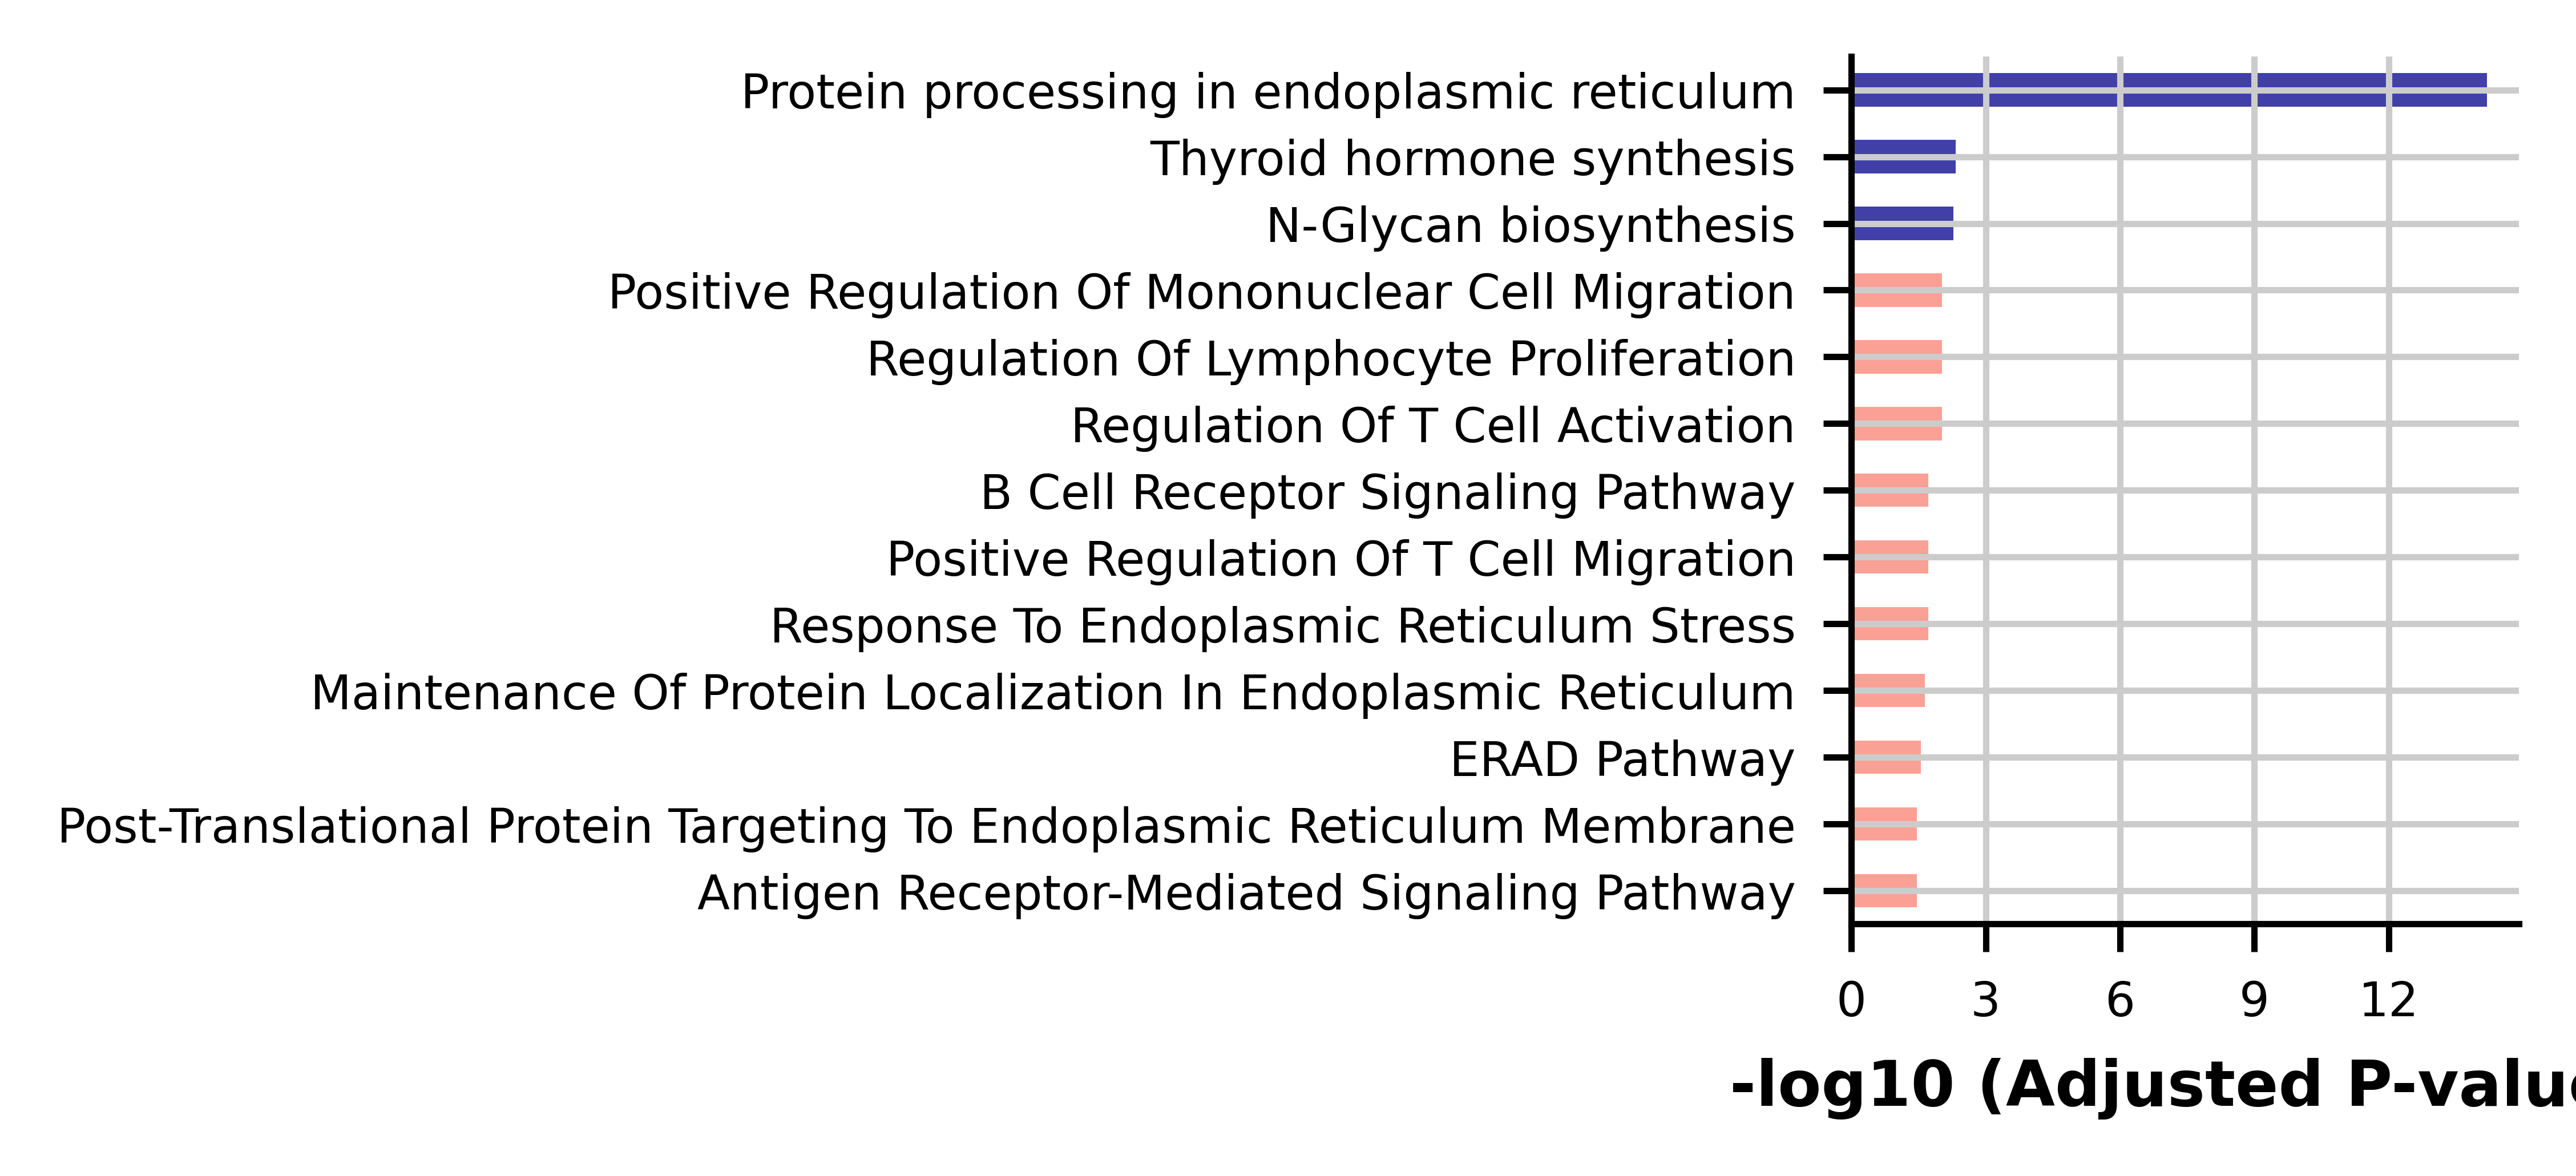

In [206]:
import gseapy as gp
# simple plotting function
from gseapy import barplot, dotplot

# D14
g = "num_IGH_S";i = "D14PI_GC1"
goi_corr_30 = pd.read_csv("../output_files/GC_smooth/smooth_"+g+"_"+i+".csv")
cf = 0.4
gene_list = goi_corr_30[goi_corr_30['Corr'] >= 0.4][['Gene']]
# gene_list = pd.concat([pd.DataFrame({'Gene': ['Ifng']}), gene_list], ignore_index=True)
sele_terms = ['KEGG_2019_Mouse','GO_Biological_Process_2023']
print(gene_list.shape)
enr = gp.enrichr(gene_list=gene_list, # or "./tests/data/gene_list.txt",
                #  gene_sets=['MSigDB_Hallmark_2020','KEGG_2019_Mouse','GO_Biological_Process_2023','GO_Cellular_Component_2023','GO_Molecular_Function_2023','HDSigDB_Mouse_2021'],
                #  gene_sets = ['MSigDB_Hallmark_2020','KEGG_2019_Mouse'],
                 gene_sets = sele_terms,
                 organism='Mouse', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )
enr.results.to_csv("../output_files/GC_smooth/Enrichr_corr_"+g+"_"+i+".csv",index=False)
sele_enr_res = enr.results[enr.results['Gene_set'].isin(sele_terms)]
# Remove GO numbers from 'Term' column
sele_enr_res['Term'] = sele_enr_res['Term'].str.replace(r' \(Amer\d+\)', '', regex=True)
sele_enr_res['Term'] = sele_enr_res['Term'].str.replace(r' \(GO:\d+\)', '', regex=True)
ax = barplot(sele_enr_res,
              column="Adjusted P-value",
              group='Gene_set', # set group, so you could do a multi-sample/library comparsion
              size=10,
              top_term=10,
              figsize=(1.5,2),
              #color=['darkred', 'darkblue'] # set colors for group
          color = {'GO_Biological_Process_2023': 'salmon', 'KEGG_2019_Mouse':'darkblue'}
             )
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.xlabel("-log10 (Adjusted P-value)", fontsize=8)
# plt.legend(fontsize = 8)
fig= ax.get_figure()
fig.savefig('figures/Individual_GCs/Enrichr_'+i+'_pos_corr_cutoff04_'+g+'_Legend.png',dpi = 500,transparent=True)
fig.savefig('figures/Individual_GCs/Enrichr_'+i+'_pos_corr_cutoff04_'+g+'_Legend.pdf',dpi = 500,transparent=True)
plt.legend().set_visible(False)
fig= ax.get_figure()
fig.savefig('figures/Individual_GCs/Enrichr_'+i+'_pos_corr_cutoff04_'+g+'.png',dpi = 500,transparent=True)
fig.savefig('figures/Individual_GCs/Enrichr_'+i+'_pos_corr_cutoff04_'+g+'pdf',dpi = 500,transparent=True)
# output the csv

(94, 1)


/home/sj657/miniconda3/envs/c2l_env/lib/python3.9/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/sj657/miniconda3/envs/c2l_env/lib/python3.9/site-packages/gseapy/plot.py:689: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


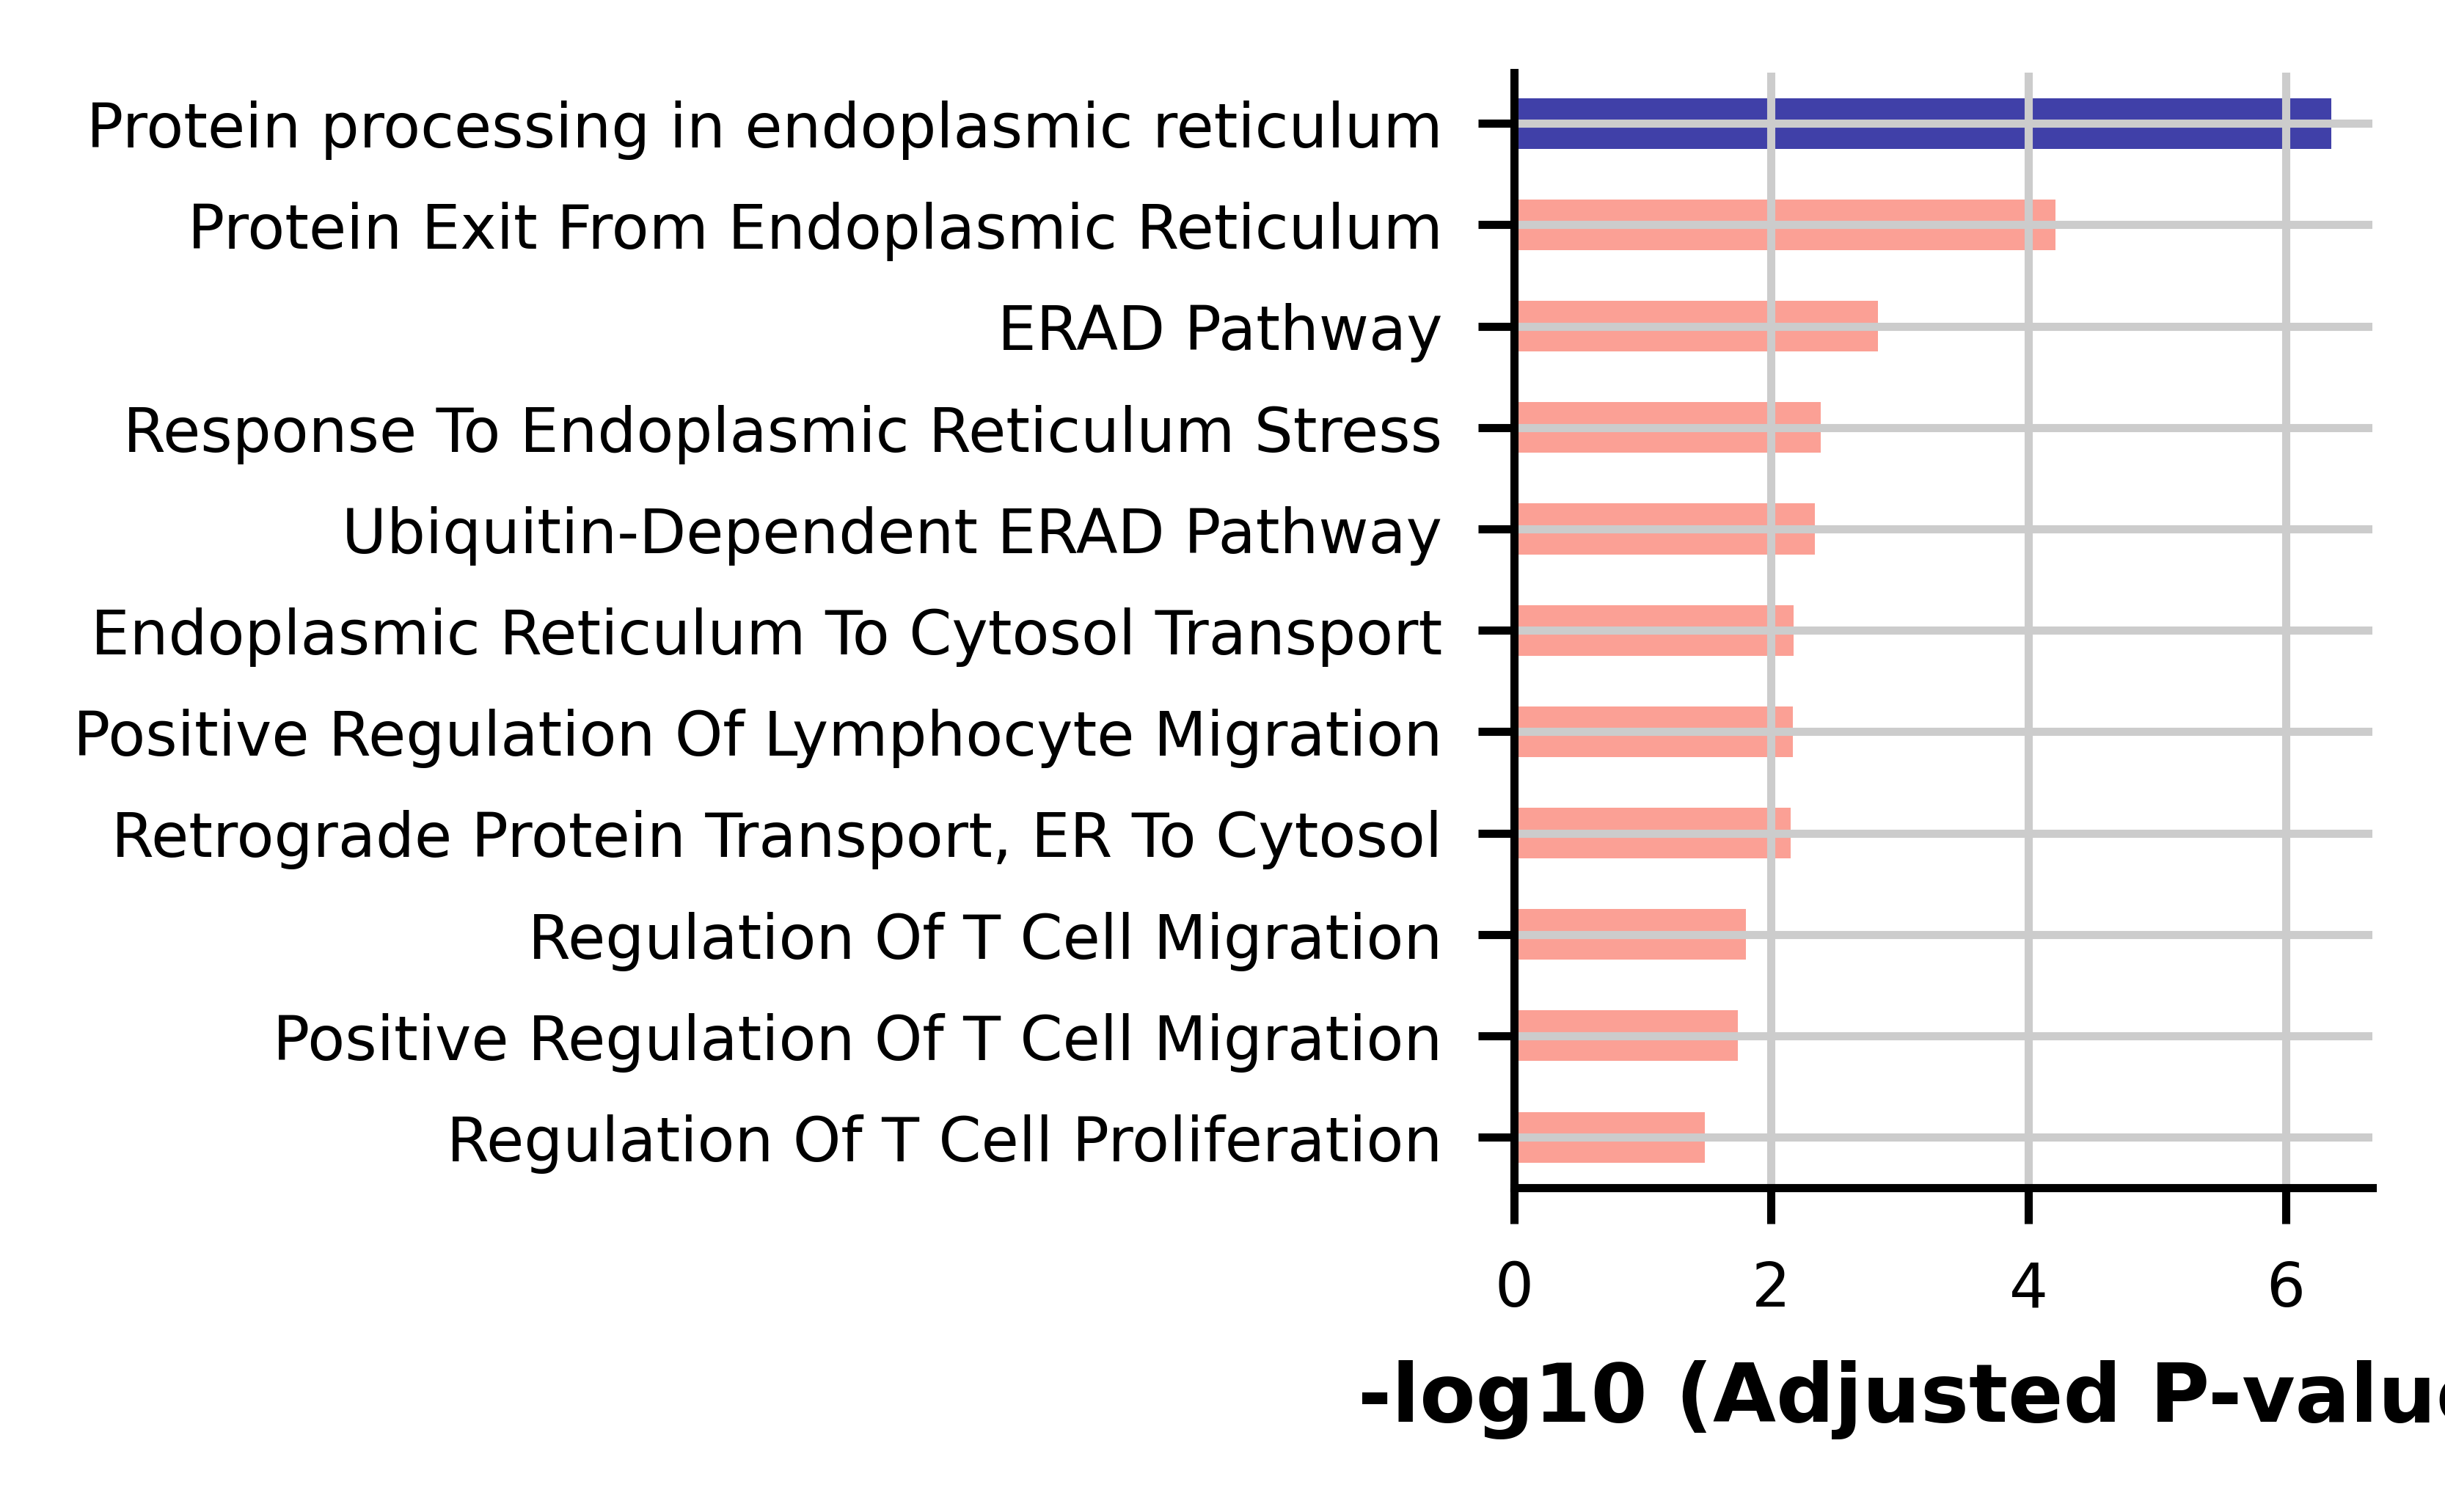

In [204]:
# D21
g = "num_IGH_S";i = "D21PI_GC3"
goi_corr_30 = pd.read_csv("../output_files/GC_smooth/smooth_"+g+"_"+i+".csv")
cf = 0.4
gene_list = goi_corr_30[goi_corr_30['Corr'] >= 0.4][['Gene']]
# gene_list = pd.concat([pd.DataFrame({'Gene': ['Ifng']}), gene_list], ignore_index=True)
sele_terms = ['KEGG_2019_Mouse','GO_Biological_Process_2023']
print(gene_list.shape)
enr = gp.enrichr(gene_list=gene_list, # or "./tests/data/gene_list.txt",
                #  gene_sets=['MSigDB_Hallmark_2020','KEGG_2019_Mouse','GO_Biological_Process_2023','GO_Cellular_Component_2023','GO_Molecular_Function_2023','HDSigDB_Mouse_2021'],
                #  gene_sets = ['MSigDB_Hallmark_2020','KEGG_2019_Mouse'],
                 gene_sets = sele_terms,
                 organism='Mouse', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )
enr.results.to_csv("../output_files/GC_smooth/Enrichr_corr_"+g+"_"+i+".csv",index=False)
sele_enr_res = enr.results[enr.results['Gene_set'].isin(sele_terms)]
# Remove GO numbers from 'Term' column
sele_enr_res['Term'] = sele_enr_res['Term'].str.replace(r' \(Amer\d+\)', '', regex=True)
sele_enr_res['Term'] = sele_enr_res['Term'].str.replace(r' \(GO:\d+\)', '', regex=True)
ax = barplot(sele_enr_res,
              column="Adjusted P-value",
              group='Gene_set', # set group, so you could do a multi-sample/library comparsion
              size=10,
              top_term=10,
              figsize=(1.5,2),
              #color=['darkred', 'darkblue'] # set colors for group
          color = {'GO_Biological_Process_2023': 'salmon', 'KEGG_2019_Mouse':'darkblue'}
             )
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.xlabel("-log10 (Adjusted P-value)", fontsize=8)
# plt.legend(fontsize = 8)
fig= ax.get_figure()
fig.savefig('figures/Individual_GCs/Enrichr_'+i+'_pos_corr_cutoff04_'+g+'_Legend.png',dpi = 500,transparent=True)
fig.savefig('figures/Individual_GCs/Enrichr_'+i+'_pos_corr_cutoff04_'+g+'_Legend.pdf',dpi = 500,transparent=True)
plt.legend().set_visible(False)
fig= ax.get_figure()
fig.savefig('figures/Individual_GCs/Enrichr_'+i+'_pos_corr_cutoff04_'+g+'.png',dpi = 500,transparent=True)
fig.savefig('figures/Individual_GCs/Enrichr_'+i+'_pos_corr_cutoff04_'+g+'pdf',dpi = 500,transparent=True)

## Plot the smoothy for the DZ LZ genes

In [ ]:
# int_genes = ['num_IGH_S','Xbp1','Aicda','Bst2','Selplg','Irf4','Mzb1','Edem1','Man1b1','Ganab','Ddost','Cxcl13','Cxcl12','Cxcr5','Cxcr4','H13','H2-Q7']
int_genes = ['Cd40','Cd40lg']
sc.settings.set_figure_params(dpi=500, dpi_save= 500, fontsize=8, facecolor='white', frameon=False, figsize=(2, 2), vector_friendly = False, transparent=True, format="pdf")
for g in int_genes:
    print(g)
    sc.pl.spatial(sm_d14, color =g,cmap="Reds",spot_size=40,show=False,title=g,colorbar_loc='right', vmin=0,vmax='p99')
    # Save the plot with the name of the gene
    output_filename = f"./figures/Individual_GCs/SP_{g}_sm_d14.pdf"
    plt.savefig(output_filename, transparent=True, format='pdf')
    # Close the figure to free up memory
    plt.close()
    
    sc.pl.spatial(sm_d21, color =g,cmap="Reds",spot_size=40,show=False,title=g,colorbar_loc='right', vmin=0,vmax='p99')
    # Save the plot with the name of the gene
    output_filename = f"./figures/Individual_GCs/SP_{g}_sm_d21.pdf"
    plt.savefig(output_filename, transparent=True, format='pdf')
    # Close the figure to free up memory
    plt.close()

In [145]:
# also the IGH_S_CS_count
tmp_obs = adata.obs.copy()
selected_columns = tmp_obs.filter(regex = r'^IGH.*_[MS]_(CDR3|CS)$').columns
tmp_obs = tmp_obs[selected_columns]
tmp_obs.fillna(0,inplace=True)
tmp_obs['IGH_M_CDR3_count'] = tmp_obs.filter(regex = r'^IGH.*_M_CDR3$').sum(axis=1)
tmp_obs['IGH_S_CDR3_count'] = tmp_obs.filter(regex = r'^IGH.*_S_CDR3$').sum(axis=1)
tmp_obs['IGH_M_CS_count'] = tmp_obs.filter(regex = r'^IGH.*_M_CS$').sum(axis=1)
tmp_obs['IGH_S_CS_count'] = tmp_obs.filter(regex = r'^IGH.*_S_CS$').sum(axis=1)
adata.obs['num_IGH_S'] = tmp_obs['IGH_S_CS_count']

In [146]:
# convert num_IGH_umi NaN to 0
adata.obs['num_IGH_umi'] = adata.obs['num_IGH_umi'].fillna(0)
# Step 3: Integrate both 'num_IGH_umi' and 'num_IGH_S' into the X matrix
x_column_umi = adata.obs['num_IGH_umi'].values.reshape(-1, 1)
x_column_s = adata.obs['num_IGH_S'].values.reshape(-1, 1)

# Convert both to sparse format
x_sparse_umi = sp.csr_matrix(x_column_umi)
x_sparse_s = sp.csr_matrix(x_column_s)

# Horizontally stack the new columns to the original X matrix
new_x = sp.hstack([adata.X, x_sparse_umi, x_sparse_s])

# Step 4: Create the new AnnData object
new_adata = sc.AnnData(
    X=new_x,
    obs=adata.obs.copy(),  # Include updated .obs with 'num_IGH_umi' and 'num_IGH_S'
    var=pd.concat(
        [
            adata.var,
            pd.DataFrame(index=["num_IGH_umi", "num_IGH_S"])  # Add new entries for the variables
        ]
    )
)

# Step 5: Add the spatial layer
new_adata.obsm['spatial'] = adata.obsm['spatial'].copy()

# Step 6: Update adata to the new AnnData object
adata = new_adata.copy()

# Step 7: Add total counts to .var
adata.var['total_counts'] = np.sum(adata.X, axis=0).A1  # Ensure proper shape

# Step 8: Normalization (TPM + log1p)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# Step 9: Add log1p total counts to .var
adata.var['log1p_total_counts'] = np.sum(adata.X, axis=0).A1  # Ensure proper shape

# Step 10: Filter genes based on total counts
GENE_COUNT_THRESHOLD = 50
adata = adata[:, adata.var['total_counts'] >= GENE_COUNT_THRESHOLD]

# Step 11: Update .obs index to match barcode column
adata.obs.index = adata.obs['barcode']

In [147]:
adata.var

,total_counts,log1p_total_counts
Mrpl15,165.0,323.897635
Lypla1,60.0,123.097628
Tcea1,286.0,523.404922
Atp6v1h,63.0,121.529696
Rb1cc1,79.0,159.749848
...,...,...
mt-Cytb,2466.0,3286.181826
AC149090.1,205.0,415.610652
CAAA01118383.1,100.0,197.808647
num_IGH_umi,283.0,408.084188


## Gaussian process

In [197]:
# smooth_adata_d14 = gauss_process(adata_input = adata,gaus_sd = 30)
smooth_adata_d14 = gauss_process(adata_input = adata,gaus_sd = 50)

Variation in X-direction: 999.0
Variation in Y-direction: 1099.6
Number of points in grid: 44400
Number of points in fitted grid: 2486
Gaussian smoothing running... done!
X partial gaussian smoothing running... done!
Y partial gaussian smoothing running... done!


In [196]:
1+1

2

In [149]:
smooth_adata_d14.write_h5ad("../output_files/GC_smooth/Smooth_adata_D14PI_GC1.h5ad")

In [117]:
# grid_sm_grad_adata_30 = gauss_process(adata_input = adata,gaus_sd = 30) # I think 30 is generally good enough
# grid_sm_grad_adata_50 = gauss_process(adata_input = adata, gaus_sd = 50)
# grid_sm_grad_adata_100 = gauss_process(adata_input = adata, gaus_sd = 100)
# save the smoothed objects
# grid_sm_grad_adata_out.write_h5ad("../output_files/Fig_IFNG/objects/adata_D3_OuterCortex_smooth.h5ad")
# grid_sm_grad_adata_in.write_h5ad("../output_files/Fig_IFNG/objects/adata_D3_InnerCortex_smooth.h5ad")
# grid_sm_grad_adata_whole.write_h5ad("../output_files/Fig_IFNG/objects/adata_D3_Whole_smooth.h5ad")

# adata_smooth_dict = {"D14_GC1_sm30":grid_sm_grad_adata_30}
# # save
# with open('..//output_files/objects/adata_D14_GC1_smooth_dict.pkl', 'wb') as file:
#     pickle.dump(adata_smooth_dict, file)

Variation in X-direction: 998.6000000000004
Variation in Y-direction: 953.4000000000001
Number of points in grid: 38400
Number of points in fitted grid: 2034
Gaussian smoothing running... done!
X partial gaussian smoothing running... done!
Y partial gaussian smoothing running... done!


In [118]:
# goi_corr_30 = calculate_goi_corr(grid_sm_grad_adata_30, GOI="Cxcl13")
goi_corr_30 = calculate_goi_corr(grid_sm_grad_adata_30, GOI="num_IGH_umi")
goi_corr_30

/tmp/ipykernel_965432/4006543577.py:6: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var[f"{GOI}_SR"] = adata.var_names == GOI


,Gene,Corr
5665,num_IGH_umi,1.0
704,Slpi,0.746603
2768,Hsp90b1,0.71006
1658,Jchain,0.695999
4557,Ighg2c,0.668489
...,...,...
2812,Lyz1,-0.190405
2617,Rwdd1,-0.202434
2119,Nop2,-0.204415
4085,Pitpnc1,-0.21022


In [120]:
# output to csv
adata_tmp = adata_smooth_dict['D14_GC1_sm30']
g = "num_IGH_umi";i = "D14PI_GC1"
goi_corr_30 = calculate_goi_corr(smoothed_data=adata_tmp, GOI=g)
goi_corr_30.to_csv("../output_files/GC_smooth/smooth_"+g+"_"+i+".csv", index = False)

In [150]:
# output to csv
g = "num_IGH_S";i = "D14PI_GC1"
goi_corr_30 = calculate_goi_corr(smoothed_data=smooth_adata_d14, GOI=g)
goi_corr_30.to_csv("../output_files/GC_smooth/smooth_"+g+"_"+i+".csv", index = False)

/tmp/ipykernel_965432/4006543577.py:6: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var[f"{GOI}_SR"] = adata.var_names == GOI


In [ ]:
g = "num_IGH_S"
sc.pl.spatial(smooth_adata_d14, color =g,cmap="Reds",spot_size=40,show=False,title=g,colorbar_loc='right', vmin=0,vmax='p99')

In [ ]:
# plot the spatial?
g = "Cxcl13"
sc.settings.set_figure_params(dpi=500, dpi_save= 500, fontsize=8, facecolor='white', frameon=False, figsize=(2, 2), vector_friendly = False, transparent=True, format="pdf")
sc.pl.spatial(grid_sm_grad_adata_30, color =g,cmap="Reds",spot_size=70,show=False,title=g,colorbar_loc='right', vmin=0,vmax='p99')
sc.pl.spatial(grid_sm_grad_adata_50, color =g,cmap="Reds",spot_size=70,show=False,title=g,colorbar_loc='right', vmin=0,vmax='p99')
sc.pl.spatial(grid_sm_grad_adata_100, color =g,cmap="Reds",spot_size=70,show=False,title=g,colorbar_loc='right', vmin=0,vmax='p99')

In [ ]:
# plot the spatial?
g = "Aicda"
sc.settings.set_figure_params(dpi=500, dpi_save= 500, fontsize=8, facecolor='white', frameon=False, figsize=(2, 2), vector_friendly = False, transparent=True, format="pdf")
sc.pl.spatial(grid_sm_grad_adata_30, color =g,cmap="Reds",spot_size=70,show=False,title=g,colorbar_loc='right', vmin=0,vmax='p99')
sc.pl.spatial(grid_sm_grad_adata_50, color =g,cmap="Reds",spot_size=70,show=False,title=g,colorbar_loc='right', vmin=0,vmax='p99')
sc.pl.spatial(grid_sm_grad_adata_100, color =g,cmap="Reds",spot_size=70,show=False,title=g,colorbar_loc='right', vmin=0,vmax='p99')

In [ ]:
# plot the spatial?
g = "Xbp1"
sc.settings.set_figure_params(dpi=500, dpi_save= 500, fontsize=8, facecolor='white', frameon=False, figsize=(2, 2), vector_friendly = False, transparent=True, format="pdf")
sc.pl.spatial(grid_sm_grad_adata_30, color =g,cmap="Reds",spot_size=70,show=False,title=g,colorbar_loc='right', vmin=0,vmax='p99')
sc.pl.spatial(grid_sm_grad_adata_50, color =g,cmap="Reds",spot_size=70,show=False,title=g,colorbar_loc='right', vmin=0,vmax='p99')
sc.pl.spatial(grid_sm_grad_adata_100, color =g,cmap="Reds",spot_size=70,show=False,title=g,colorbar_loc='right', vmin=0,vmax='p99')

In [68]:
# Maybe we could use from the meta to do the corr as well
adata_tmp

AnnData object with n_obs × n_vars = 2034 × 5665
    obs: 'x', 'y', 'GOI_Cxcl13', 'GOI_Aicda'
    var: 'total_counts', 'log1p_total_counts'
    obsm: 'spatial'
    layers: 'X_grad_mag', 'X_grad_dir'

## Try on D21PI GC3

In [136]:
adata = adata_gc_dict['D21PI_GC3'].copy()
adata

AnnData object with n_obs × n_vars = 1534 × 31053
    obs: 'barcode', 'x', 'y', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'Sample', 'Index', 'S_score', 'G2M_score', 'phase', 'Celltypes_c2lLN', 'Broad_celltypes', 'Refine_celltypes', 'CD4_CD8_type', 'Bcell_subtype_c2lHTA', 'Region', 'num_ONT_reads', 'num_ONT_umi', 'num_align_reads', 'num_align_umi', 'num_TRBC_reads', 'num_TRBC_umi', 'num_TRAC_reads', 'num_TRAC_umi', 'num_IGKC_reads', 'num_IGKC_umi', 'num_IGLC_reads', 'num_IGLC_umi', 'num_IGHM_reads', 'num_IGHM_umi', 'num_IGHD_reads', 'num_IGHD_umi', 'num_IGHG1_reads', 'num_IGHG1_umi', 'num_IGHG2B_reads', 'num_IGHG2B_umi', 'num_IGHG2C_reads', 'num_IGHG2C_umi', 'num_IGHG3_reads', 'num_IGHG3_umi', 'num_IGHE_reads', 'num_IGHE_umi', 'num_IGHA_reads', 'num_IGHA_umi', 'num_clones_IGH', 'num_clones_IGK', 'num_clones_IGL', 'num_clones_TRA', 'num_clones_TRB', 'IGH_MutFreq', 'IGK_MutFreq', 'IGL_MutFreq', 'TRA_MutFreq', 'TRB_MutFreq', 'IGH_MutCount', 'IGK_MutCount', 'I

In [137]:
# also the IGH_S_CS_count
tmp_obs = adata.obs.copy()
selected_columns = tmp_obs.filter(regex = r'^IGH.*_[MS]_(CDR3|CS)$').columns
tmp_obs = tmp_obs[selected_columns]
tmp_obs.fillna(0,inplace=True)
tmp_obs['IGH_M_CDR3_count'] = tmp_obs.filter(regex = r'^IGH.*_M_CDR3$').sum(axis=1)
tmp_obs['IGH_S_CDR3_count'] = tmp_obs.filter(regex = r'^IGH.*_S_CDR3$').sum(axis=1)
tmp_obs['IGH_M_CS_count'] = tmp_obs.filter(regex = r'^IGH.*_M_CS$').sum(axis=1)
tmp_obs['IGH_S_CS_count'] = tmp_obs.filter(regex = r'^IGH.*_S_CS$').sum(axis=1)
adata.obs['num_IGH_S'] = tmp_obs['IGH_S_CS_count']

In [138]:
# convert num_IGH_umi NaN to 0
adata.obs['num_IGH_umi'] = adata.obs['num_IGH_umi'].fillna(0)
# Step 3: Integrate both 'num_IGH_umi' and 'num_IGH_S' into the X matrix
x_column_umi = adata.obs['num_IGH_umi'].values.reshape(-1, 1)
x_column_s = adata.obs['num_IGH_S'].values.reshape(-1, 1)

# Convert both to sparse format
x_sparse_umi = sp.csr_matrix(x_column_umi)
x_sparse_s = sp.csr_matrix(x_column_s)

# Horizontally stack the new columns to the original X matrix
new_x = sp.hstack([adata.X, x_sparse_umi, x_sparse_s])

# Step 4: Create the new AnnData object
new_adata = sc.AnnData(
    X=new_x,
    obs=adata.obs.copy(),  # Include updated .obs with 'num_IGH_umi' and 'num_IGH_S'
    var=pd.concat(
        [
            adata.var,
            pd.DataFrame(index=["num_IGH_umi", "num_IGH_S"])  # Add new entries for the variables
        ]
    )
)

# Step 5: Add the spatial layer
new_adata.obsm['spatial'] = adata.obsm['spatial'].copy()

# Step 6: Update adata to the new AnnData object
adata = new_adata.copy()

# Step 7: Add total counts to .var
adata.var['total_counts'] = np.sum(adata.X, axis=0).A1  # Ensure proper shape

# Step 8: Normalization (TPM + log1p)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# Step 9: Add log1p total counts to .var
adata.var['log1p_total_counts'] = np.sum(adata.X, axis=0).A1  # Ensure proper shape

# Step 10: Filter genes based on total counts
GENE_COUNT_THRESHOLD = 50
adata = adata[:, adata.var['total_counts'] >= GENE_COUNT_THRESHOLD]

# Step 11: Update .obs index to match barcode column
adata.obs.index = adata.obs['barcode']

In [139]:
adata.var

,total_counts,log1p_total_counts
Tcea1,65.0,185.612287
Pcmtd1,50.0,148.838160
Snhg6,57.0,166.799179
Cops5,79.0,227.844304
Rpl7,1939.0,3599.243240
...,...,...
mt-Nd5,115.0,317.080049
mt-Cytb,679.0,1684.340079
AC149090.1,67.0,190.343380
num_IGH_umi,257.0,530.189045


In [140]:
# smooth_adata = gauss_process(adata_input = adata,gaus_sd = 30)
smooth_adata = gauss_process(adata_input = adata,gaus_sd = 50)

Variation in X-direction: 899.0
Variation in Y-direction: 799.0999999999999
Number of points in grid: 35800
Number of points in fitted grid: 1532
Gaussian smoothing running... done!
X partial gaussian smoothing running... done!
Y partial gaussian smoothing running... done!


In [143]:
smooth_adata.write_h5ad("../output_files/GC_smooth/Smooth_adata_D21PI_GC3.h5ad")

In [63]:
g = "Cxcl13";i = "D21PI_GC3"
goi_corr_30 = calculate_goi_corr(smoothed_data=smooth_adata, GOI=g)
goi_corr_30.to_csv("../output_files/GC_smooth/smooth_"+g+"_"+i+".csv", index = False)

/home/sj657/.local/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [64]:
g = "Aicda";i = "D21PI_GC3"
goi_corr_30 = calculate_goi_corr(smoothed_data=smooth_adata, GOI=g)
goi_corr_30.to_csv("../output_files/GC_smooth/smooth_"+g+"_"+i+".csv", index = False)

/home/sj657/.local/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [127]:
g = "num_IGH_umi";i = "D21PI_GC3"
goi_corr_30 = calculate_goi_corr(smoothed_data=smooth_adata, GOI=g)
goi_corr_30.to_csv("../output_files/GC_smooth/smooth_"+g+"_"+i+".csv", index = False)

/tmp/ipykernel_965432/4006543577.py:6: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var[f"{GOI}_SR"] = adata.var_names == GOI


In [141]:
g = "num_IGH_S";i = "D21PI_GC3"
goi_corr_30 = calculate_goi_corr(smoothed_data=smooth_adata, GOI=g)
goi_corr_30.to_csv("../output_files/GC_smooth/smooth_"+g+"_"+i+".csv", index = False)

/tmp/ipykernel_965432/4006543577.py:6: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var[f"{GOI}_SR"] = adata.var_names == GOI


In [ ]:
g = "num_IGH_S"
sc.pl.spatial(smooth_adata, color =g,cmap="Reds",spot_size=40,show=False,title=g,colorbar_loc='right', vmin=0,vmax='p99')

In [ ]:
g = "Xbp1"
sc.pl.spatial(smooth_adata, color =g,cmap="Reds",spot_size=40,show=False,title=g,colorbar_loc='right', vmin=0,vmax='p99')

## GSEA on these genes?

In [153]:
import gseapy as gp
# simple plotting function
from gseapy import barplot, dotplot
# mouse = gp.get_library_name(organism='Mouse')

In [156]:
gene_list

,Gene
0,Ifng
1,num_IGH_S
2,Ighg2c
3,Slpi
4,num_IGH_umi
...,...
142,Gdi1
143,C4b
144,Trp53inp1
145,Lsp1


In [ ]:
g = "num_IGH_S";i = "D14PI_GC1"
goi_corr_30 = pd.read_csv("../output_files/GC_smooth/smooth_"+g+"_"+i+".csv")
cf = 0.4
gene_list = goi_corr_30[goi_corr_30['Corr'] >= 0.4][['Gene']]
# gene_list = pd.concat([pd.DataFrame({'Gene': ['Ifng']}), gene_list], ignore_index=True)
sele_terms = ['KEGG_2019_Mouse','GO_Biological_Process_2023']
print(gene_list.shape)
enr = gp.enrichr(gene_list=gene_list, # or "./tests/data/gene_list.txt",
                #  gene_sets=['MSigDB_Hallmark_2020','KEGG_2019_Mouse','GO_Biological_Process_2023','GO_Cellular_Component_2023','GO_Molecular_Function_2023','HDSigDB_Mouse_2021'],
                #  gene_sets = ['MSigDB_Hallmark_2020','KEGG_2019_Mouse'],
                 gene_sets = sele_terms,
                 organism='Mouse', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )
enr.results.to_csv("../output_files/GC_smooth/Enrichr_corr_"+g+"_"+i+".csv",index=False)
sele_enr_res = enr.results[enr.results['Gene_set'].isin(sele_terms)]
# Remove GO numbers from 'Term' column
sele_enr_res['Term'] = sele_enr_res['Term'].str.replace(r' \(Amer\d+\)', '', regex=True)
sele_enr_res['Term'] = sele_enr_res['Term'].str.replace(r' \(GO:\d+\)', '', regex=True)
ax = barplot(sele_enr_res,
              column="Adjusted P-value",
              group='Gene_set', # set group, so you could do a multi-sample/library comparsion
              size=10,
              top_term=10,
              figsize=(1.5,2),
              #color=['darkred', 'darkblue'] # set colors for group
          color = {'GO_Biological_Process_2023': 'salmon', 'KEGG_2019_Mouse':'darkblue'}
             )
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.xlabel("-log10 (Adjusted P-value)", fontsize=8)
# plt.legend(fontsize = 8)
fig= ax.get_figure()
fig.savefig('figures/Individual_GCs/Enrichr_'+i+'_pos_corr_cutoff04_'+g+'_Legend.png',dpi = 500,transparent=True)
fig.savefig('figures/Individual_GCs/Enrichr_'+i+'_pos_corr_cutoff04_'+g+'_Legend.pdf',dpi = 500,transparent=True)
plt.legend().set_visible(False)
fig= ax.get_figure()
fig.savefig('figures/Individual_GCs/Enrichr_'+i+'_pos_corr_cutoff04_'+g+'.png',dpi = 500,transparent=True)
fig.savefig('figures/Individual_GCs/Enrichr_'+i+'_pos_corr_cutoff04_'+g+'pdf',dpi = 500,transparent=True)
# output the csv


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2019_Mouse,Protein processing in endoplasmic reticulum,20/163,3.463332e-24,2.666766e-22,0,0,43.210227,2334.208309,PDIA3;XBP1;HSPA5;SSR4;RPN2;SSR2;EDEM1;DERL3;RP...
1,KEGG_2019_Mouse,N-Glycan biosynthesis,5/50,2.115835e-06,8.145963e-05,0,0,27.947961,365.169763,GANAB;RPN2;RPN1;MAN1B1;DDOST
2,KEGG_2019_Mouse,Staphylococcus aureus infection,5/95,4.990913e-05,1.281001e-03,0,0,13.942335,138.103101,C4B;C3;C1QA;C1RA;SELPLG
3,KEGG_2019_Mouse,Protein export,3/28,2.170231e-04,4.177695e-03,0,0,29.468148,248.578762,SEC61A1;HSPA5;SEC11C
4,KEGG_2019_Mouse,Pertussis,4/76,2.950982e-04,4.544512e-03,0,0,13.780556,112.011147,C4B;C3;C1QA;C1RA
...,...,...,...,...,...,...,...,...,...,...
824,GO_Biological_Process_2023,Regulation Of DNA-templated Transcription (GO:...,5/1922,9.158623e-01,9.207600e-01,0,0,0.594250,0.052228,XBP1;SUB1;MDM4;CALR;APOE
825,GO_Biological_Process_2023,Negative Regulation Of DNA-templated Transcrip...,2/1025,9.336958e-01,9.374356e-01,0,0,0.450445,0.030903,MDM4;CALR
826,GO_Biological_Process_2023,Positive Regulation Of DNA-templated Transcrip...,2/1243,9.702711e-01,9.728585e-01,0,0,0.367033,0.011077,XBP1;APOE
827,GO_Biological_Process_2023,Regulation Of Transcription By RNA Polymerase ...,4/2028,9.760872e-01,9.773869e-01,0,0,0.441996,0.010698,XBP1;SUB1;MDM4;CALR


In [180]:
# D14
adata = adata_gc_dict['D14PI_GC1'].copy()
# also the IGH_S_CS_count
tmp_obs = adata.obs.copy()
selected_columns = tmp_obs.filter(regex = r'^IGH.*_[MS]_(CDR3|CS)$').columns
tmp_obs = tmp_obs[selected_columns]
tmp_obs.fillna(0,inplace=True)
tmp_obs['IGH_M_CDR3_count'] = tmp_obs.filter(regex = r'^IGH.*_M_CDR3$').sum(axis=1)
tmp_obs['IGH_S_CDR3_count'] = tmp_obs.filter(regex = r'^IGH.*_S_CDR3$').sum(axis=1)
tmp_obs['IGH_M_CS_count'] = tmp_obs.filter(regex = r'^IGH.*_M_CS$').sum(axis=1)
tmp_obs['IGH_S_CS_count'] = tmp_obs.filter(regex = r'^IGH.*_S_CS$').sum(axis=1)
adata.obs['num_IGH_S'] = tmp_obs['IGH_S_CS_count']
# convert num_IGH_umi NaN to 0
adata.obs['num_IGH_umi'] = adata.obs['num_IGH_umi'].fillna(0)
# Step 3: Integrate both 'num_IGH_umi' and 'num_IGH_S' into the X matrix
x_column_umi = adata.obs['num_IGH_umi'].values.reshape(-1, 1)
x_column_s = adata.obs['num_IGH_S'].values.reshape(-1, 1)

# Convert both to sparse format
x_sparse_umi = sp.csr_matrix(x_column_umi)
x_sparse_s = sp.csr_matrix(x_column_s)

# Horizontally stack the new columns to the original X matrix
new_x = sp.hstack([adata.X, x_sparse_umi, x_sparse_s])

# Step 4: Create the new AnnData object
new_adata = sc.AnnData(
    X=new_x,
    obs=adata.obs.copy(),  # Include updated .obs with 'num_IGH_umi' and 'num_IGH_S'
    var=pd.concat(
        [
            adata.var,
            pd.DataFrame(index=["num_IGH_umi", "num_IGH_S"])  # Add new entries for the variables
        ]
    )
)

# Step 5: Add the spatial layer
new_adata.obsm['spatial'] = adata.obsm['spatial'].copy()

# Step 6: Update adata to the new AnnData object
adata = new_adata.copy()

# Step 7: Add total counts to .var
adata.var['total_counts'] = np.sum(adata.X, axis=0).A1  # Ensure proper shape

# Step 8: Normalization (TPM + log1p)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# Step 9: Add log1p total counts to .var
adata.var['log1p_total_counts'] = np.sum(adata.X, axis=0).A1  # Ensure proper shape

# Step 10: Filter genes based on total counts
GENE_COUNT_THRESHOLD = 10
adata = adata[:, adata.var['total_counts'] >= GENE_COUNT_THRESHOLD]

# Step 11: Update .obs index to match barcode column
adata.obs.index = adata.obs['barcode']
sm_d14 = gauss_process(adata_input = adata,gaus_sd = 30)

# D21
adata = adata_gc_dict['D21PI_GC3'].copy()
# also the IGH_S_CS_count
tmp_obs = adata.obs.copy()
selected_columns = tmp_obs.filter(regex = r'^IGH.*_[MS]_(CDR3|CS)$').columns
tmp_obs = tmp_obs[selected_columns]
tmp_obs.fillna(0,inplace=True)
tmp_obs['IGH_M_CDR3_count'] = tmp_obs.filter(regex = r'^IGH.*_M_CDR3$').sum(axis=1)
tmp_obs['IGH_S_CDR3_count'] = tmp_obs.filter(regex = r'^IGH.*_S_CDR3$').sum(axis=1)
tmp_obs['IGH_M_CS_count'] = tmp_obs.filter(regex = r'^IGH.*_M_CS$').sum(axis=1)
tmp_obs['IGH_S_CS_count'] = tmp_obs.filter(regex = r'^IGH.*_S_CS$').sum(axis=1)
adata.obs['num_IGH_S'] = tmp_obs['IGH_S_CS_count']
# convert num_IGH_umi NaN to 0
adata.obs['num_IGH_umi'] = adata.obs['num_IGH_umi'].fillna(0)
# Step 3: Integrate both 'num_IGH_umi' and 'num_IGH_S' into the X matrix
x_column_umi = adata.obs['num_IGH_umi'].values.reshape(-1, 1)
x_column_s = adata.obs['num_IGH_S'].values.reshape(-1, 1)

# Convert both to sparse format
x_sparse_umi = sp.csr_matrix(x_column_umi)
x_sparse_s = sp.csr_matrix(x_column_s)

# Horizontally stack the new columns to the original X matrix
new_x = sp.hstack([adata.X, x_sparse_umi, x_sparse_s])

# Step 4: Create the new AnnData object
new_adata = sc.AnnData(
    X=new_x,
    obs=adata.obs.copy(),  # Include updated .obs with 'num_IGH_umi' and 'num_IGH_S'
    var=pd.concat(
        [
            adata.var,
            pd.DataFrame(index=["num_IGH_umi", "num_IGH_S"])  # Add new entries for the variables
        ]
    )
)

# Step 5: Add the spatial layer
new_adata.obsm['spatial'] = adata.obsm['spatial'].copy()

# Step 6: Update adata to the new AnnData object
adata = new_adata.copy()

# Step 7: Add total counts to .var
adata.var['total_counts'] = np.sum(adata.X, axis=0).A1  # Ensure proper shape

# Step 8: Normalization (TPM + log1p)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# Step 9: Add log1p total counts to .var
adata.var['log1p_total_counts'] = np.sum(adata.X, axis=0).A1  # Ensure proper shape

# Step 10: Filter genes based on total counts
GENE_COUNT_THRESHOLD = 10
adata = adata[:, adata.var['total_counts'] >= GENE_COUNT_THRESHOLD]

# Step 11: Update .obs index to match barcode column
adata.obs.index = adata.obs['barcode']
sm_d21 = gauss_process(adata_input = adata,gaus_sd = 30)

Variation in X-direction: 998.6000000000004
Variation in Y-direction: 953.4000000000001
Number of points in grid: 38400
Number of points in fitted grid: 2034
Gaussian smoothing running... done!
X partial gaussian smoothing running... done!
Y partial gaussian smoothing running... done!
Variation in X-direction: 899.0
Variation in Y-direction: 799.0999999999999
Number of points in grid: 35800
Number of points in fitted grid: 1532
Gaussian smoothing running... done!
X partial gaussian smoothing running... done!
Y partial gaussian smoothing running... done!


In [5]:
# read csv
g = "num_IGH_S";i = "D14PI_GC1"
goi_corr_d14 = pd.read_csv("../output_files/GC_smooth/smooth_"+g+"_"+i+".csv")
sm_d14 = sc.read_h5ad("../output_files/GC_smooth/Smooth_adata_"+i+".h5ad")
g = "num_IGH_S";i = "D21PI_GC3"
goi_corr_d21 = pd.read_csv("../output_files/GC_smooth/smooth_"+g+"_"+i+".csv")
sm_d21 = sc.read_h5ad("../output_files/GC_smooth/Smooth_adata_"+i+".h5ad")

In [ ]:
filtered_d14 = goi_corr_d14.loc[goi_corr_d14['Corr'] >= 0.4, ['Gene', 'Corr']].rename(columns={'Corr': 'Corr_D14'})
filtered_d21 = goi_corr_d21.loc[goi_corr_d21['Corr'] >= 0.4, ['Gene', 'Corr']].rename(columns={'Corr': 'Corr_D21'})

# Merge the DataFrames on the 'Gene' column
merged_df = pd.merge(filtered_d14, filtered_d21, on='Gene', how='inner')
merged_df

In [ ]:
# cut-off 0.4
cf = 0.4
genes_d14 = set(goi_corr_d14.loc[goi_corr_d14['Corr'] >= 0.4,'Gene'])
genes_d21 = set(goi_corr_d21.loc[goi_corr_d21['Corr'] >= 0.4,'Gene'])
# Get the unique genes that are either in 'genes_in' or 'genes_out'
unique_genes = genes_d14.symmetric_difference(genes_d21)
common_genes = genes_d14.intersection(genes_d21)
common_genes

In [ ]:
# int_genes = ['num_IGH_S','Xbp1','Aicda','Bst2','Selplg','Irf4','Mzb1','Edem1','Man1b1','Ganab','Ddost','Cxcl13','Cxcl12','Cxcr5','Cxcr4']
# int_genes = ['H13','H2-Q7']
# int_genes = ['Tnfsf13','Tnfrsf13b']
int_genes = ['Prdm1']
sc.settings.set_figure_params(dpi=500, dpi_save= 500, fontsize=8, facecolor='white', frameon=False, figsize=(2, 2), vector_friendly = False, transparent=True, format="pdf")
for g in int_genes:
    print(g)
    sc.pl.spatial(sm_d14, color =g,cmap="Reds",spot_size=40,show=False,title=g,colorbar_loc='right', vmin=0,vmax='p99')
    # Save the plot with the name of the gene
    output_filename = f"./figures/Individual_GCs/SP_{g}_sm_d14.pdf"
    plt.savefig(output_filename, transparent=True, format='pdf')
    # Close the figure to free up memory
    plt.close()
    
    sc.pl.spatial(sm_d21, color =g,cmap="Reds",spot_size=40,show=False,title=g,colorbar_loc='right', vmin=0,vmax='p99')
    # Save the plot with the name of the gene
    output_filename = f"./figures/Individual_GCs/SP_{g}_sm_d21.pdf"
    plt.savefig(output_filename, transparent=True, format='pdf')
    # Close the figure to free up memory
    plt.close()